In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from matplotlib.legend_handler import HandlerLine2D

import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import randint as sp_randint

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

from scipy.stats import shapiro,mannwhitneyu,chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE #Oversampling
from sklearn.svm import SVC



from IPython.display import Image
from sklearn.tree import export_graphviz




from imblearn.pipeline import Pipeline as imbpipeline


# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Martim\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
# data.head(2)

In [4]:
# data.info()

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# data['Browser'].value_counts()

In [7]:
# data.dtypes
data['Type_of_Traffic']=data['Type_of_Traffic'].astype(object)
data['Browser']=data['Browser'].astype(object)

In [8]:
data['Date']= pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x: x.strftime("%m"))
data['Day']=data['Date'].apply(lambda x: x.strftime("%d"))
data['Year']=data['Date'].apply(lambda x: x.strftime("%Y"))
data['WeekDay']=data['Date'].apply(lambda x: x.strftime("%w"))
data['WeekDay']=data['WeekDay'].astype(int)
data['Weekend']=data['WeekDay'].apply(lambda x: 1 if((x==0 | x==6)) else 0)
data.drop('Date',axis=1,inplace=True)

In [9]:
data['AccountMng_DurationxPage']=data['AccountMng_Duration']*data['AccountMng_Pages']
data['FAQ_DurationxPage']=data['FAQ_Duration']*data['FAQ_Pages']
data['Product_DurationxPage']=data['Product_Duration']*data['Product_Pages']

In [10]:
# data.columns

In [11]:
data.drop(['Access_ID'],axis=1,inplace=True)

## EDA

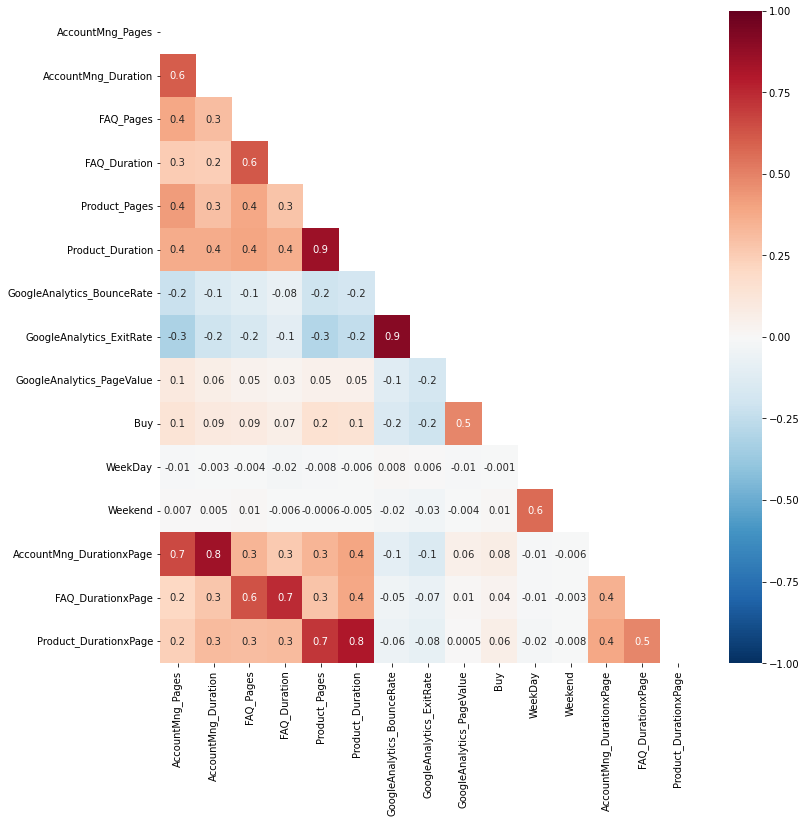

In [12]:
matrix = np.triu(data.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the above heatmap, we observe the following: 
- In general, there is very little correlation among the different features in our dataset. 
- The very few cases of high correlation (|corr| >= 0.7) are: 
    - BounceRates & ExitRates (0.9). 
    - Product_Pages & Product_Duration (0.9).
- Moderate Correlations (0.3 < |corr| < 0.7): 
    - Among the following features: AccountMng_Pages, AccountMng_Duration, FAQ, FAQ_Duration, Product_Pages, and Product_Duration. 
    - Also between PageValues and Buy. 


In [13]:
data.skew()

AccountMng_Pages               1.979876
AccountMng_Duration            5.605178
FAQ_Pages                      4.107354
FAQ_Duration                   7.627079
Product_Pages                  4.448048
Product_Duration               7.810047
GoogleAnalytics_BounceRate     2.940060
GoogleAnalytics_ExitRate       2.146977
GoogleAnalytics_PageValue      6.430620
Browser                        3.276347
Type_of_Traffic                1.612960
Buy                            1.904594
Month                         -0.052872
Day                            0.002801
Year                           0.000000
WeekDay                        0.061719
Weekend                        2.478471
AccountMng_DurationxPage       9.624520
FAQ_DurationxPage             25.791410
Product_DurationxPage         25.678751
dtype: float64

In [14]:
data.kurtosis()

AccountMng_Pages                 4.850987
AccountMng_Duration             49.501068
FAQ_Pages                       28.776940
FAQ_Duration                    78.143659
Product_Pages                   33.129906
Product_Duration               151.725312
GoogleAnalytics_BounceRate       7.648447
GoogleAnalytics_ExitRate         3.985724
GoogleAnalytics_PageValue       67.187047
Browser                         13.013268
Type_of_Traffic                  1.410794
Buy                              1.627802
Month                           -1.618397
Day                             -1.188999
Year                             0.000000
WeekDay                         -1.205096
Weekend                          4.143649
AccountMng_DurationxPage       146.694410
FAQ_DurationxPage             1114.318873
Product_DurationxPage          963.018497
dtype: float64

#### EXPLORATORY DATA ANALYSIS

In [15]:
data['Weekend']=data['Weekend'].astype(bool)

In [16]:
num_col= ['AccountMng_Pages', 'AccountMng_Duration',
       'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue','AccountMng_DurationxPage', 'FAQ_DurationxPage',
       'Product_DurationxPage']

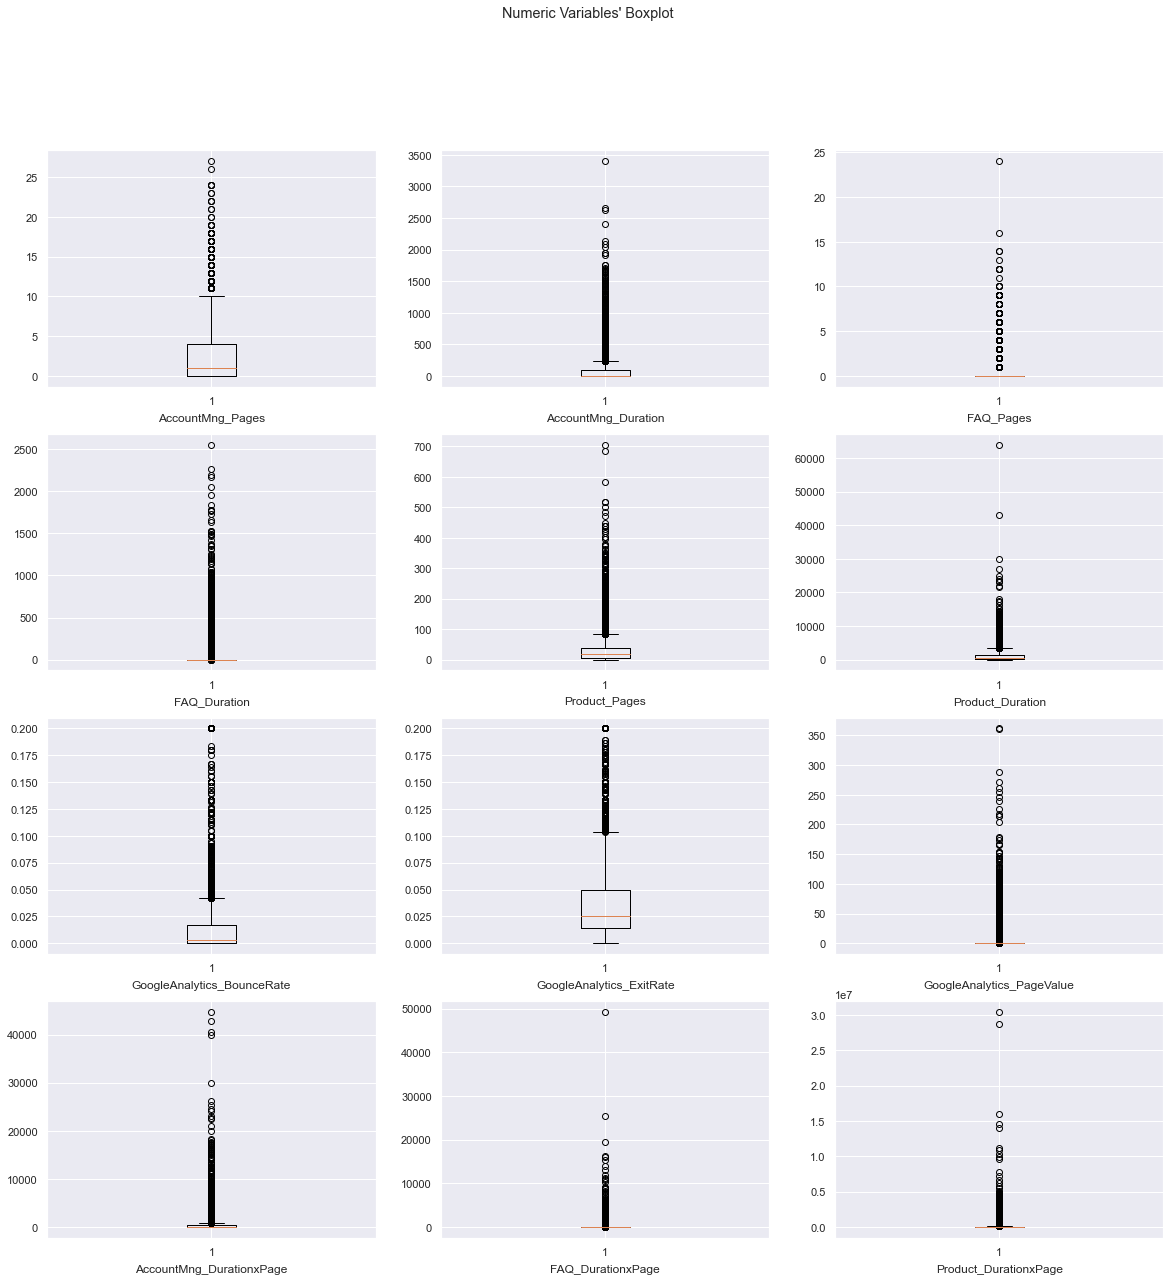

In [17]:
from math import ceil
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(num_col) / 4), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), num_col): # Notice the zip() function and flatten() method
    ax.boxplot(data[feat])
    ax.set_title(feat, y=-.17)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplot"

plt.suptitle(title)

plt.show()

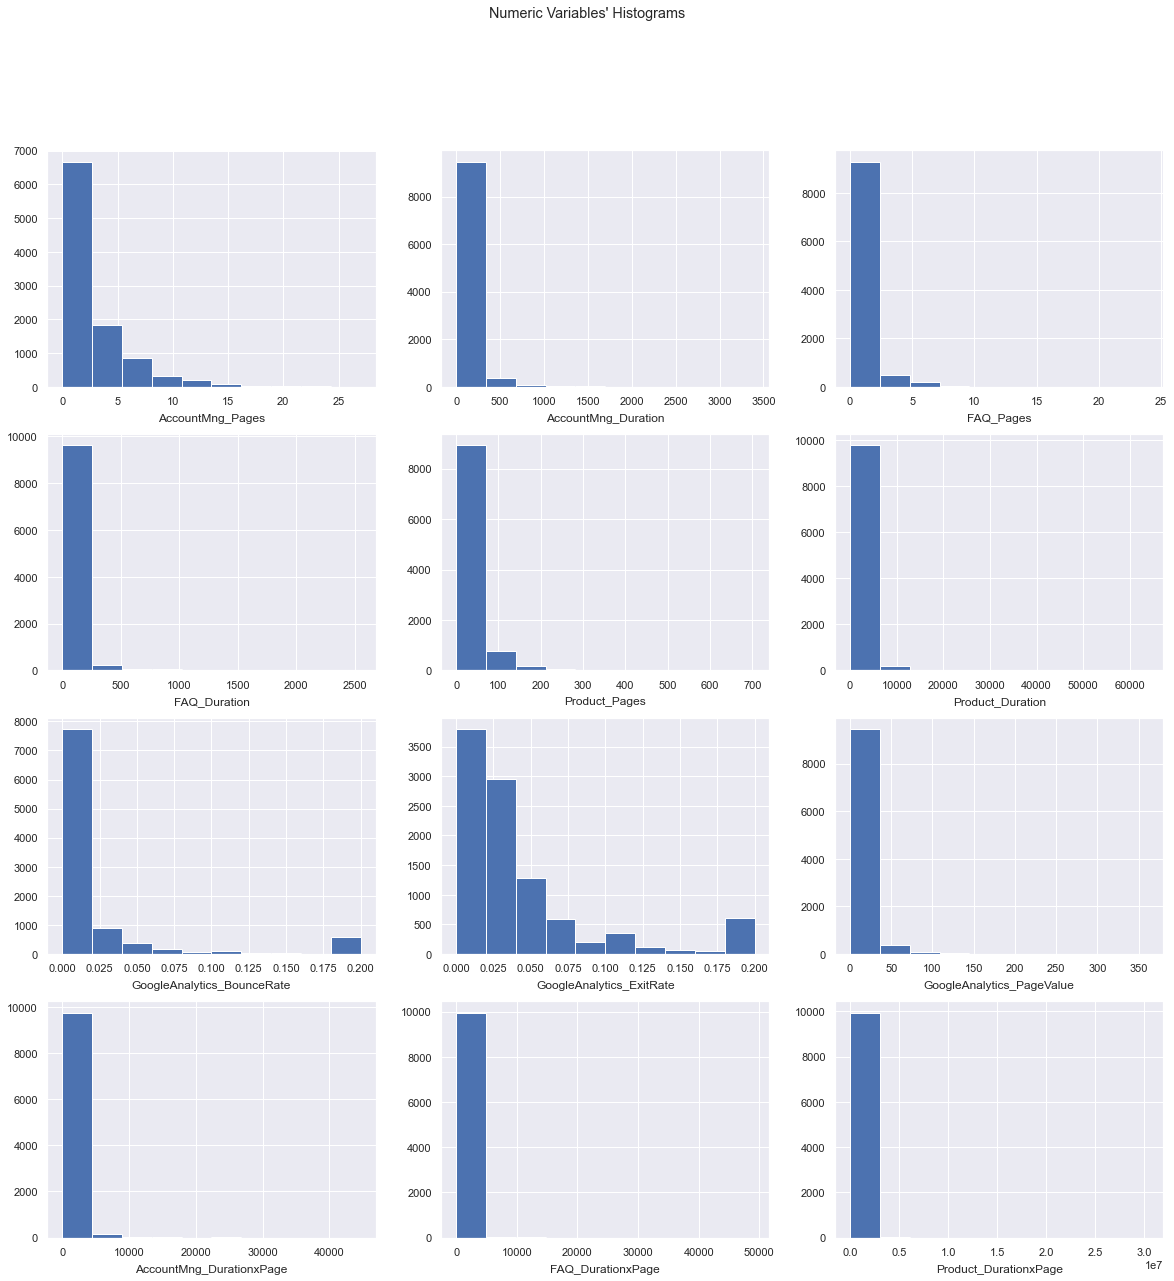

In [18]:
from math import ceil
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(num_col) / 4), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), num_col): # Notice the zip() function and flatten() method
    ax.hist(data[feat])
    ax.set_title(feat, y=-.17)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

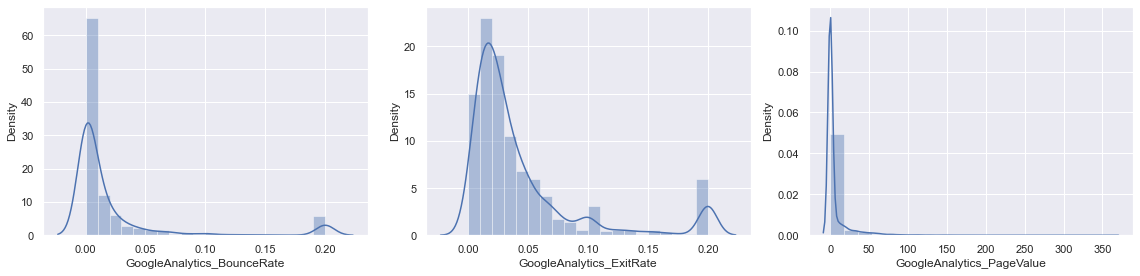

In [19]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(data['GoogleAnalytics_BounceRate'], bins=20, ax=ax1)
sns.distplot(data['GoogleAnalytics_ExitRate'], bins=20, ax=ax2)
sns.distplot(data['GoogleAnalytics_PageValue'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the above visualizations of 3 google analytics metrics, we can conclude: 

- All 3 features have distributions that are skewed right. 
- All 3 distributions have a lot of outliers. 
- The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the website. 
- Exit rate has more high values than bounce rate, which makes sense, where transaction confirmation pages for example will cause the average exit rate to increase. 
- Bounce rate ==> the percentage where the first page visited was the only page visited in that session. 
- Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page. 

### Target Variable Information:

Text(0, 0.5, '')

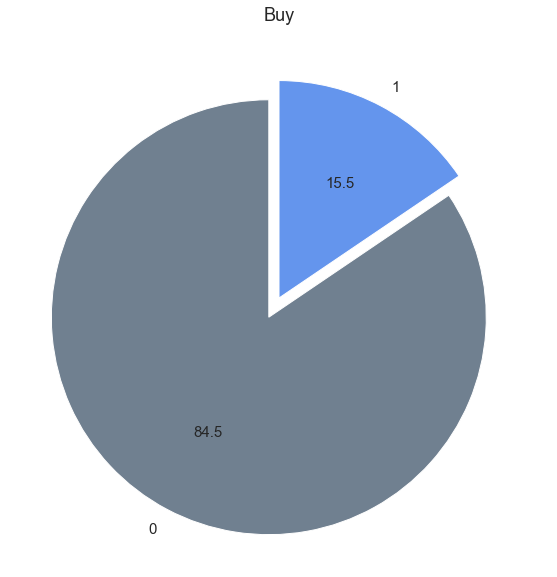

In [20]:
plt.figure(figsize=(10,10))
data['Buy'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['slategray','cornflowerblue'])
plt.title('Buy', fontsize = 18)
plt.ylabel('')

### Univariate Analysis

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


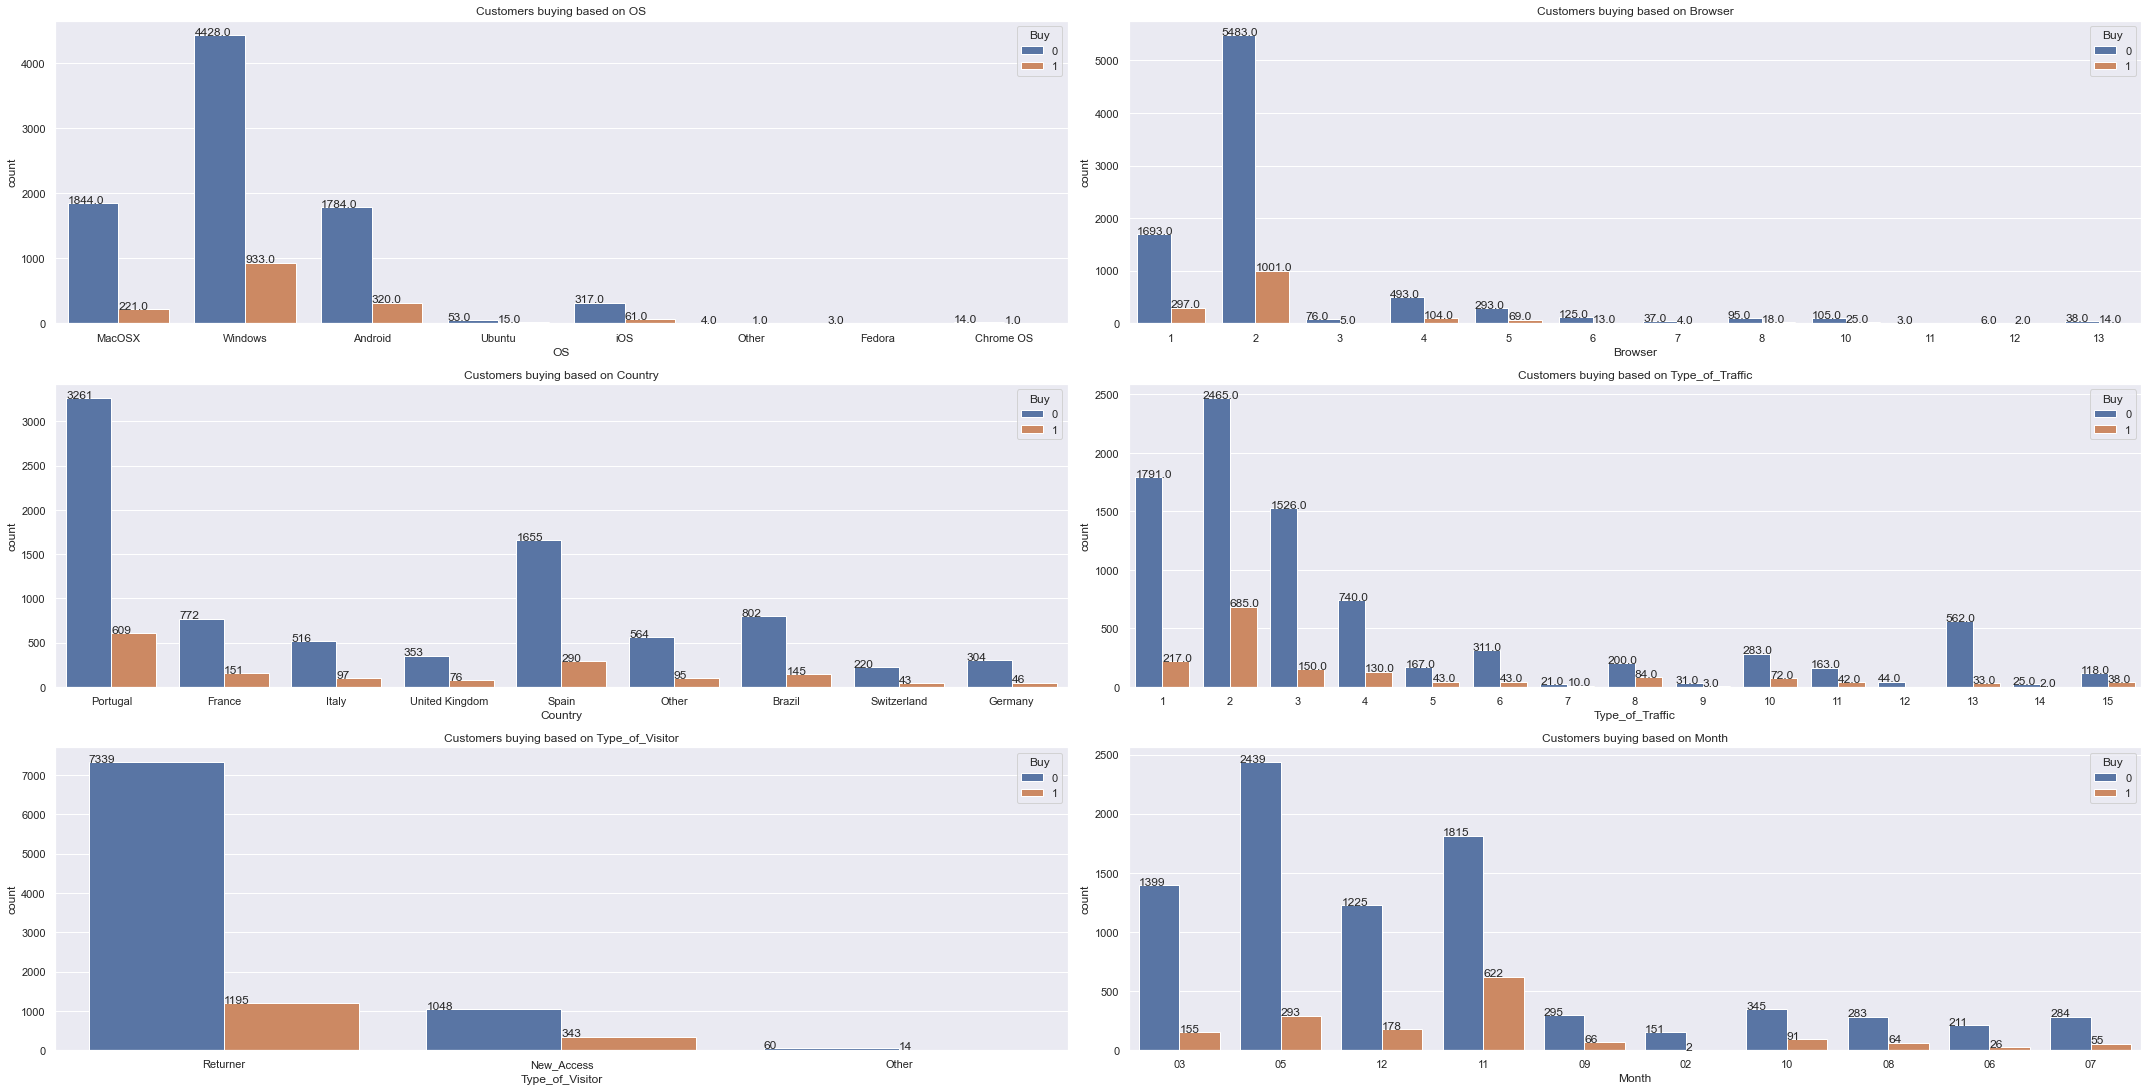

In [21]:
column1l=['OS',
       'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 
       'Month']
plt.figure(figsize=(30,30))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(data[i],hue=data['Buy'])
    ax.set_title('Customers buying based on '+ i,fontdict=None)
    plt.tight_layout()
    for p in ax.patches:
#         txt = str(p.get_height().round(2)) + '%'
        txt = str(p.get_height().round(0))
        txt_x = p.get_x() 
        txt_y = p.get_height()
        ax.text(txt_x,txt_y,txt)
plt.show()

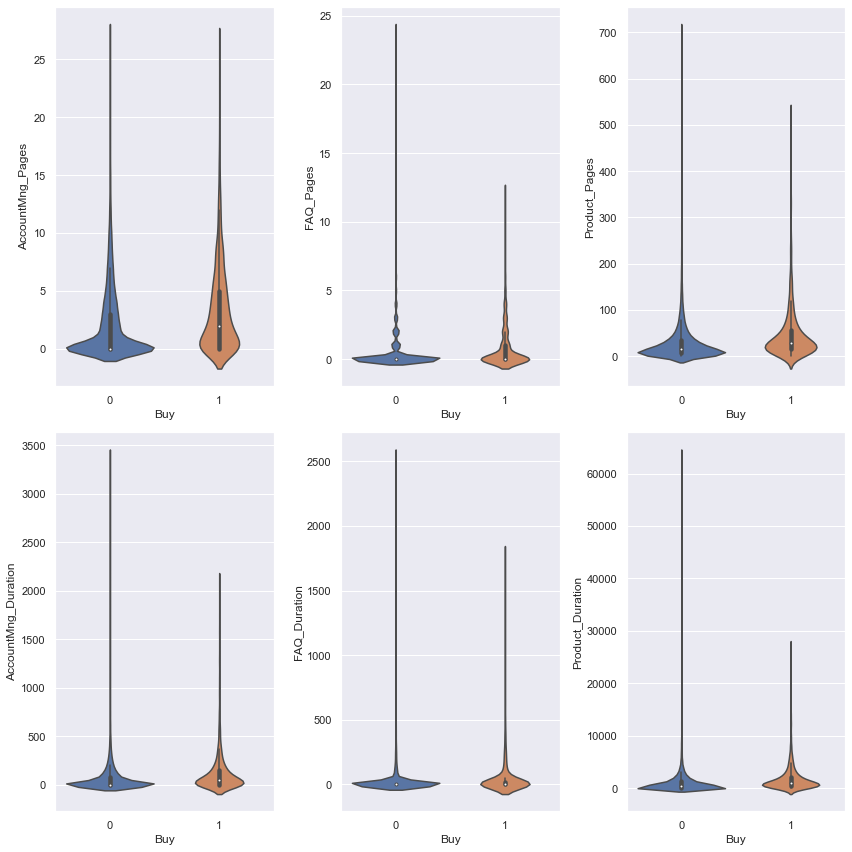

In [22]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Buy', y = 'AccountMng_Pages', ax=ax1)
sns.violinplot(data=data, x = 'Buy', y = 'FAQ_Pages', ax=ax2)
sns.violinplot(data=data, x = 'Buy', y = 'Product_Pages', ax=ax3)
sns.violinplot(data=data, x = 'Buy', y = 'AccountMng_Duration', ax=ax4)
sns.violinplot(data=data, x = 'Buy', y = 'FAQ_Duration', ax=ax5)
sns.violinplot(data=data, x = 'Buy', y = 'Product_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can see that:
- In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase. 
- The number of product related pages, and the time spent on them, is way higher than that for AccountMng_Pages or FAQ pages.
- The first 3 feature look like they follow a skewed normal distribution. 

### Date Variables Analysis

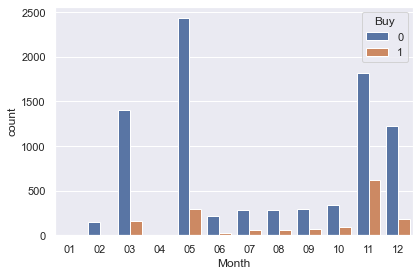

In [23]:
#Month
orderlist = ['01','02','03','04','05','06','07','08','09','10','11','12']
sns.countplot(data=data, x='Month', hue='Buy',  order=orderlist)


plt.tight_layout()
plt.show()

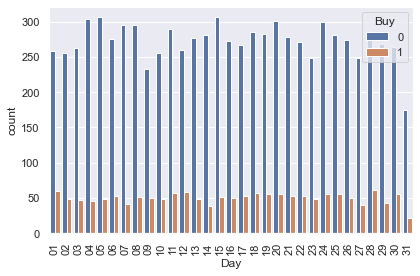

In [24]:
#Day
orderlist = ['01','02','03','04','05','06','07','08','09','10',
            '11','12','13','14','15','16','17','18','19','20',
            '21','22','23','24','25','26','27','28','29','30','31']
d = sns.countplot(data=data, x='Day', hue='Buy',  order=orderlist)
d.set_xticklabels(d.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

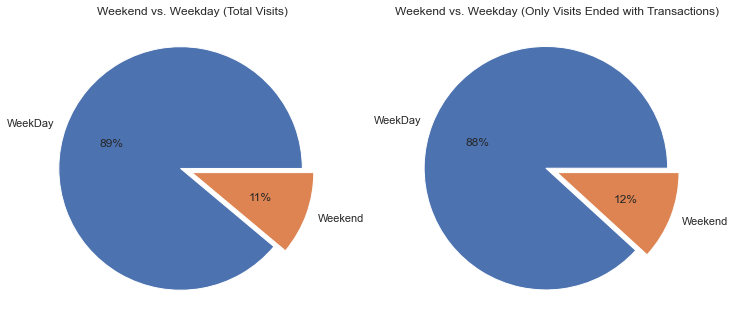

In [25]:
#WeekEnd
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data['Weekend'].value_counts(),explode=(0.1,0),labels=['WeekDay','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(data[data['Buy'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['WeekDay','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

- On March, May, November and December, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level. 
- We have no visits at all during Jan nor Apr.
- Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions. 
- It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays. 

### Multivariate Analysis

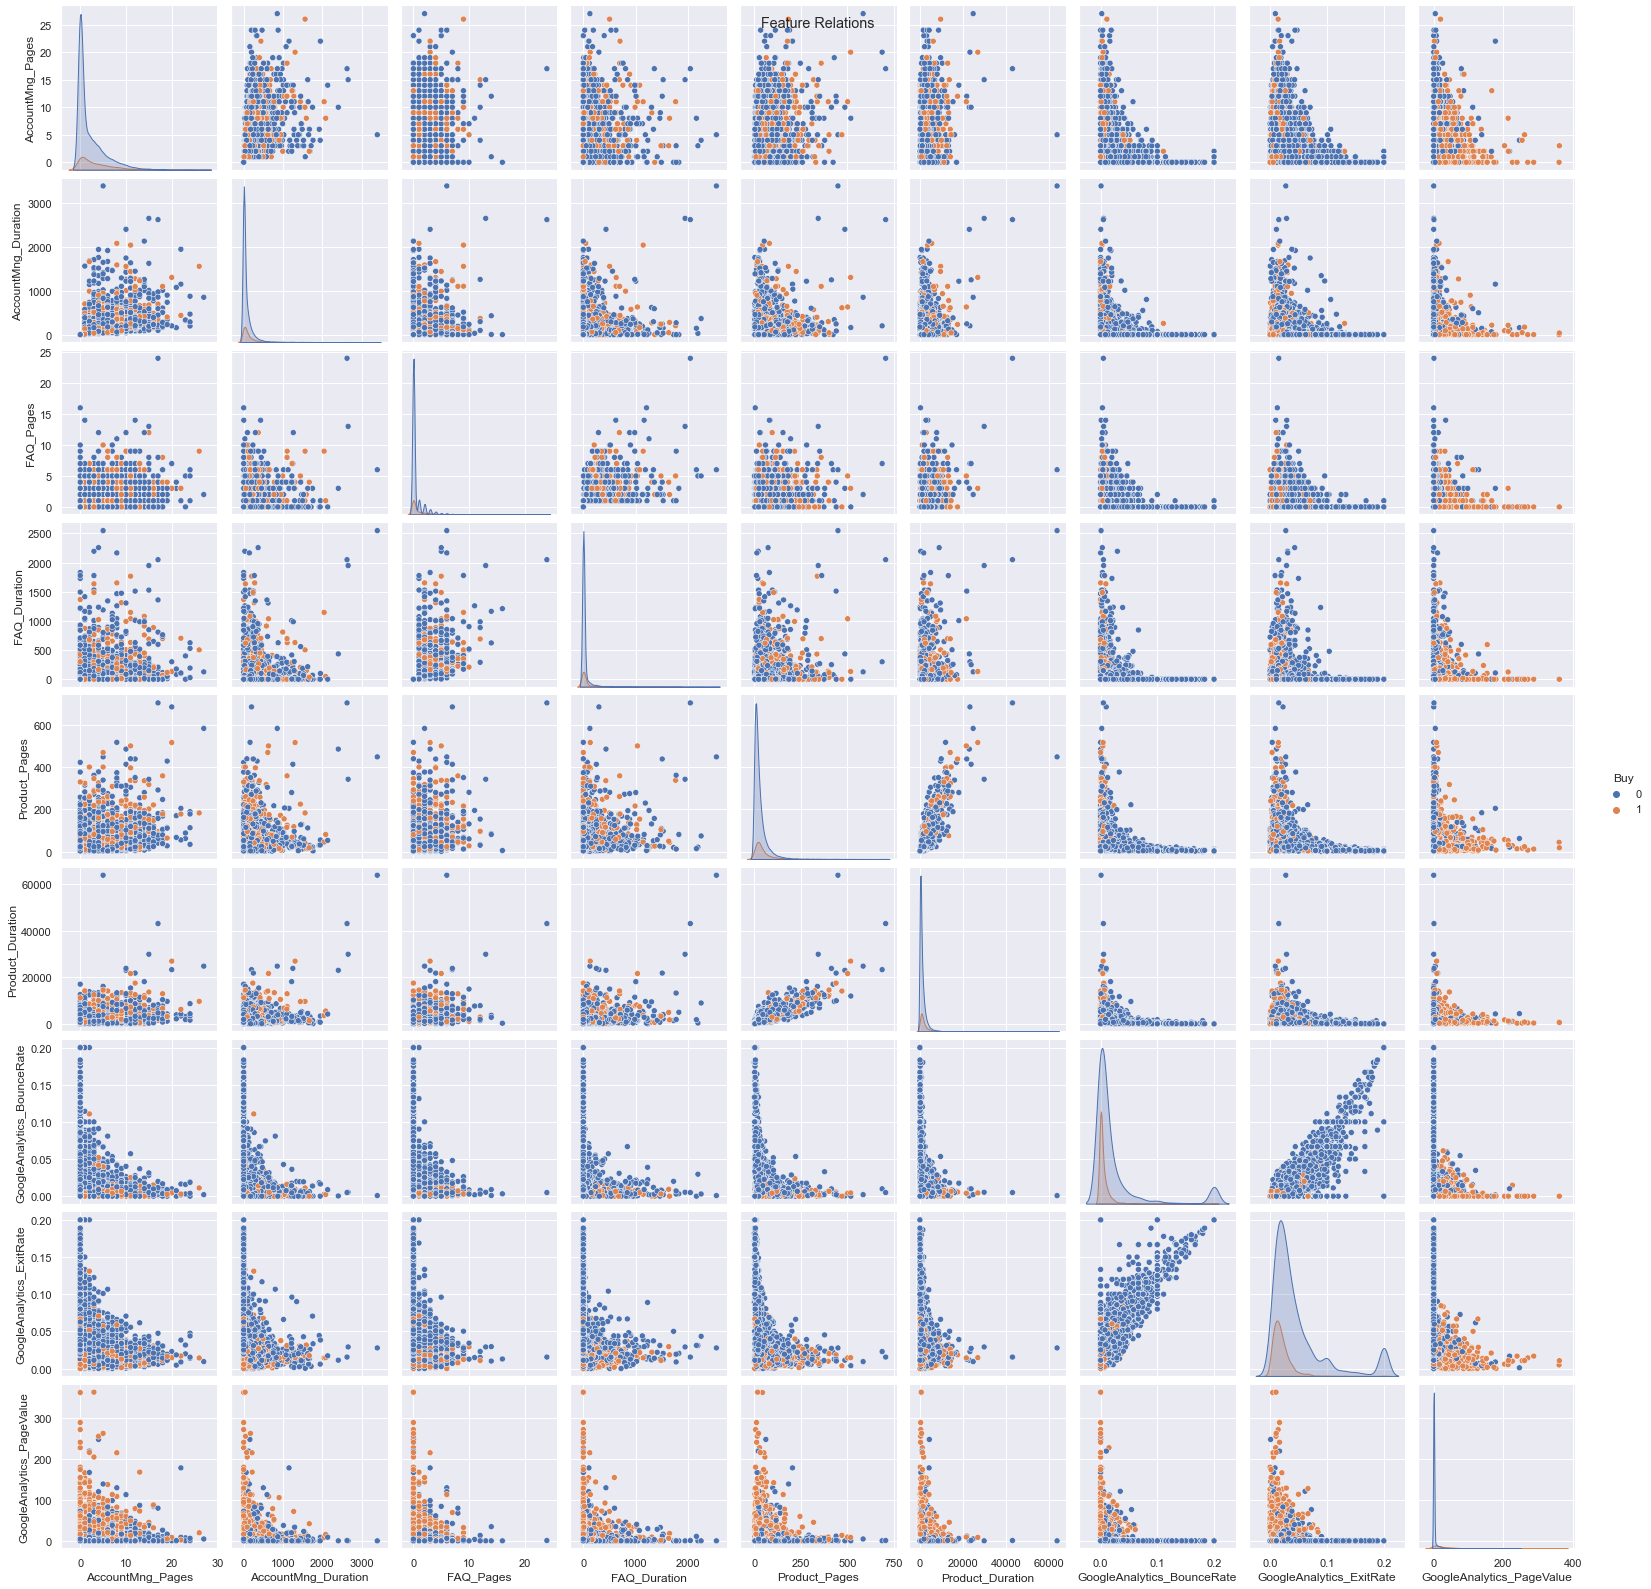

In [26]:
g1 = sns.pairplot(data[['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue','Buy']], hue='Buy')
g1.fig.suptitle('Feature Relations')
plt.show()

### Statistical Tests

In [27]:
cat_cols=['OS',
       'Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor',
       'Month','WeekDay','Weekend','Year']

In [28]:
#Qi Squared Test for Categorical Features
scol=[]
spval=[]
ss=[]
for n in cat_cols:
    scol.append(n)
    cp=chi2_contingency(pd.crosstab(data[n],data['Buy']))[1]
    spval.append(round(cp,4))
    if (cp<0.05):
        #rejects Null
        ss.append('*')#signficant
    else:#Accepts Null
        ss.append('**')#not significant

In [29]:
pd.DataFrame({'Feature':scol,'P-Value':spval,'Significance':ss})

#### Statistical Test for Numerical column vs Target Column

In [30]:
#print('Two-Sample-T-Test of ','\n')
tcol=[]
tpval=[]
ts=[]
for n in num_col:
    tcol.append(n)
    #splitting into 2 groups(Buy=1, Buy=0)
    g1=data[n][data['Buy']==0]
    g2=data[n][data['Buy']==1]
    #Test for normality(Shapiro Test)
    #H0:Data is normal
    #H0:Data is not normal
    # if p<0.05---reject Null
    for b in [g1]:
        s,p=shapiro(b)
    for c in [g2]:
        s1,p1=shapiro(c)
    if (p>0.05 or p1>0.05):
        w,lp=levene(g1,g2)
    #If data dosen't pass normality or variance test, we do non-parametric Test(Mann Whitney U Test)
    if (p<=0.05 or p1<=0.05 or lp<=0.05):
        ms,mp=mannwhitneyu(g1,g2)
        #print('Mannwhitneyu P-Value: ',mp,'\n')
        tpval.append(round(mp,4))
        if (mp<0.05):
            ts.append('*')       #significat
        else:
            ts.append('**')      #not significant

In [31]:
pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significant':ts})

### Outliers

In [32]:
# identify outliers with standard deviation
# from numpy.random import seed
# from numpy.random import randn
# from numpy import mean
# from numpy import std
out_per=[]
for i in num_col:
    data_mean, data_std = np.mean(data[i]), np.std(data[i])
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i,': \n')
# identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:', np.round(outlier_percent,2),'%','\n')
    out_per.append(outlier_percent)

In [33]:
Outliers=pd.DataFrame({'Feature':num_col,'% Of Outliers':out_per})
outlier_sorted=Outliers.sort_values('% Of Outliers',ascending=False)

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(y=outlier_sorted['Feature'],x=outlier_sorted['% Of Outliers'],palette='GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
for i, v in enumerate(list(outlier_sorted['% Of Outliers'])):
    plt.text(v,i-(-0.1),round(list(outlier_sorted['% Of Outliers'])[i],2),fontsize=8)

In [35]:
data_gaussian=data.copy()

#### Transforming the columns with Box-COx

In [36]:
data_gaussian['AccountMng_Duration'],ad=st.boxcox(data_gaussian['AccountMng_Duration']+1)
data_gaussian['FAQ_Duration'],fq = st.boxcox(data_gaussian['FAQ_Duration']+1)
data_gaussian['Product_Duration'],pd_ = st.boxcox(data_gaussian['Product_Duration']+1)
data_gaussian['AccountMng_DurationxPage'],adp= st.boxcox(data_gaussian['AccountMng_DurationxPage']+1)
data_gaussian['FAQ_DurationxPage'],fdp=st.boxcox(data_gaussian['FAQ_DurationxPage']+1)
data_gaussian['Product_DurationxPage'],pdp = st.boxcox(data_gaussian['Product_DurationxPage']+1)
data_gaussian['FAQ_Pages'],fq = st.boxcox(data_gaussian['FAQ_Pages']+1)
data_gaussian['AccountMng_Pages'],pds = st.boxcox(data_gaussian['AccountMng_Pages']+1)
data_gaussian['Product_Pages'],br= st.boxcox(data_gaussian['Product_Pages']+1)


#### Distribution After Transformation

In [37]:
data_gaussian.hist(column=num_col,figsize=(20,20))

#### Encoding -> data_gaussian & data

In [38]:
# from sklearn.preprocessing import OrdinalEncoder

data_gaussian['Weekend']=data_gaussian['Weekend'].astype(int)
X_numericas=data_gaussian[['AccountMng_Pages', 'AccountMng_Duration',
       'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue','Weekend', 'AccountMng_DurationxPage', 'FAQ_DurationxPage',
       'Product_DurationxPage']] # Gaussian, i.e. continuous
X_categoricas=data_gaussian[['OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor','Month']] # Categorical, i.e. discrete

enc = OrdinalEncoder()
X_categoricas = enc.fit_transform(X_categoricas)
X_categoricas=pd.DataFrame(X_categoricas, index=data_gaussian.index , columns=['OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor','Month'])

data_gaussian=pd.concat([X_numericas,X_categoricas],axis=1)
#data_gaussian=np.c_[X_numericas, X_categoricas[:,0].ravel(), X_categoricas[:,1].ravel()]

In [39]:
#  one hot encode data
toencode_list=['OS','Browser', 'Type_of_Traffic', 'Type_of_Visitor','Month']

In [40]:
# from sklearn.preprocessing import OneHotEncoder
df_ohc1 = data.copy()

# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc1[toencode_list])    #ver melhor o que por dentro de OneHotEncoder
ohc_feat_names = ohc.get_feature_names()
ohc_df1 = pd.DataFrame(ohc_feat, index=df_ohc1.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
df_ohc1 = pd.concat([df_ohc1.drop(columns=toencode_list), ohc_df1], axis=1)

In [41]:
data_notEncoded=data.copy()
data= df_ohc1.copy()

### Multicolinearity

In [42]:
data_vif=data[['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'AccountMng_DurationxPage',
 'FAQ_DurationxPage',
 'Product_DurationxPage']]

In [43]:
# # from statsmodels.stats.outliers_influence import variance_inflation_factor
# # import pandas as pands
# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [44]:
# calc_vif(data_vif)

##### it is acceptable if it is less than 10. small VIF values indicates low correlation among variables under ideal conditions VIF<3

### Droping columns that have high Multicollinearity

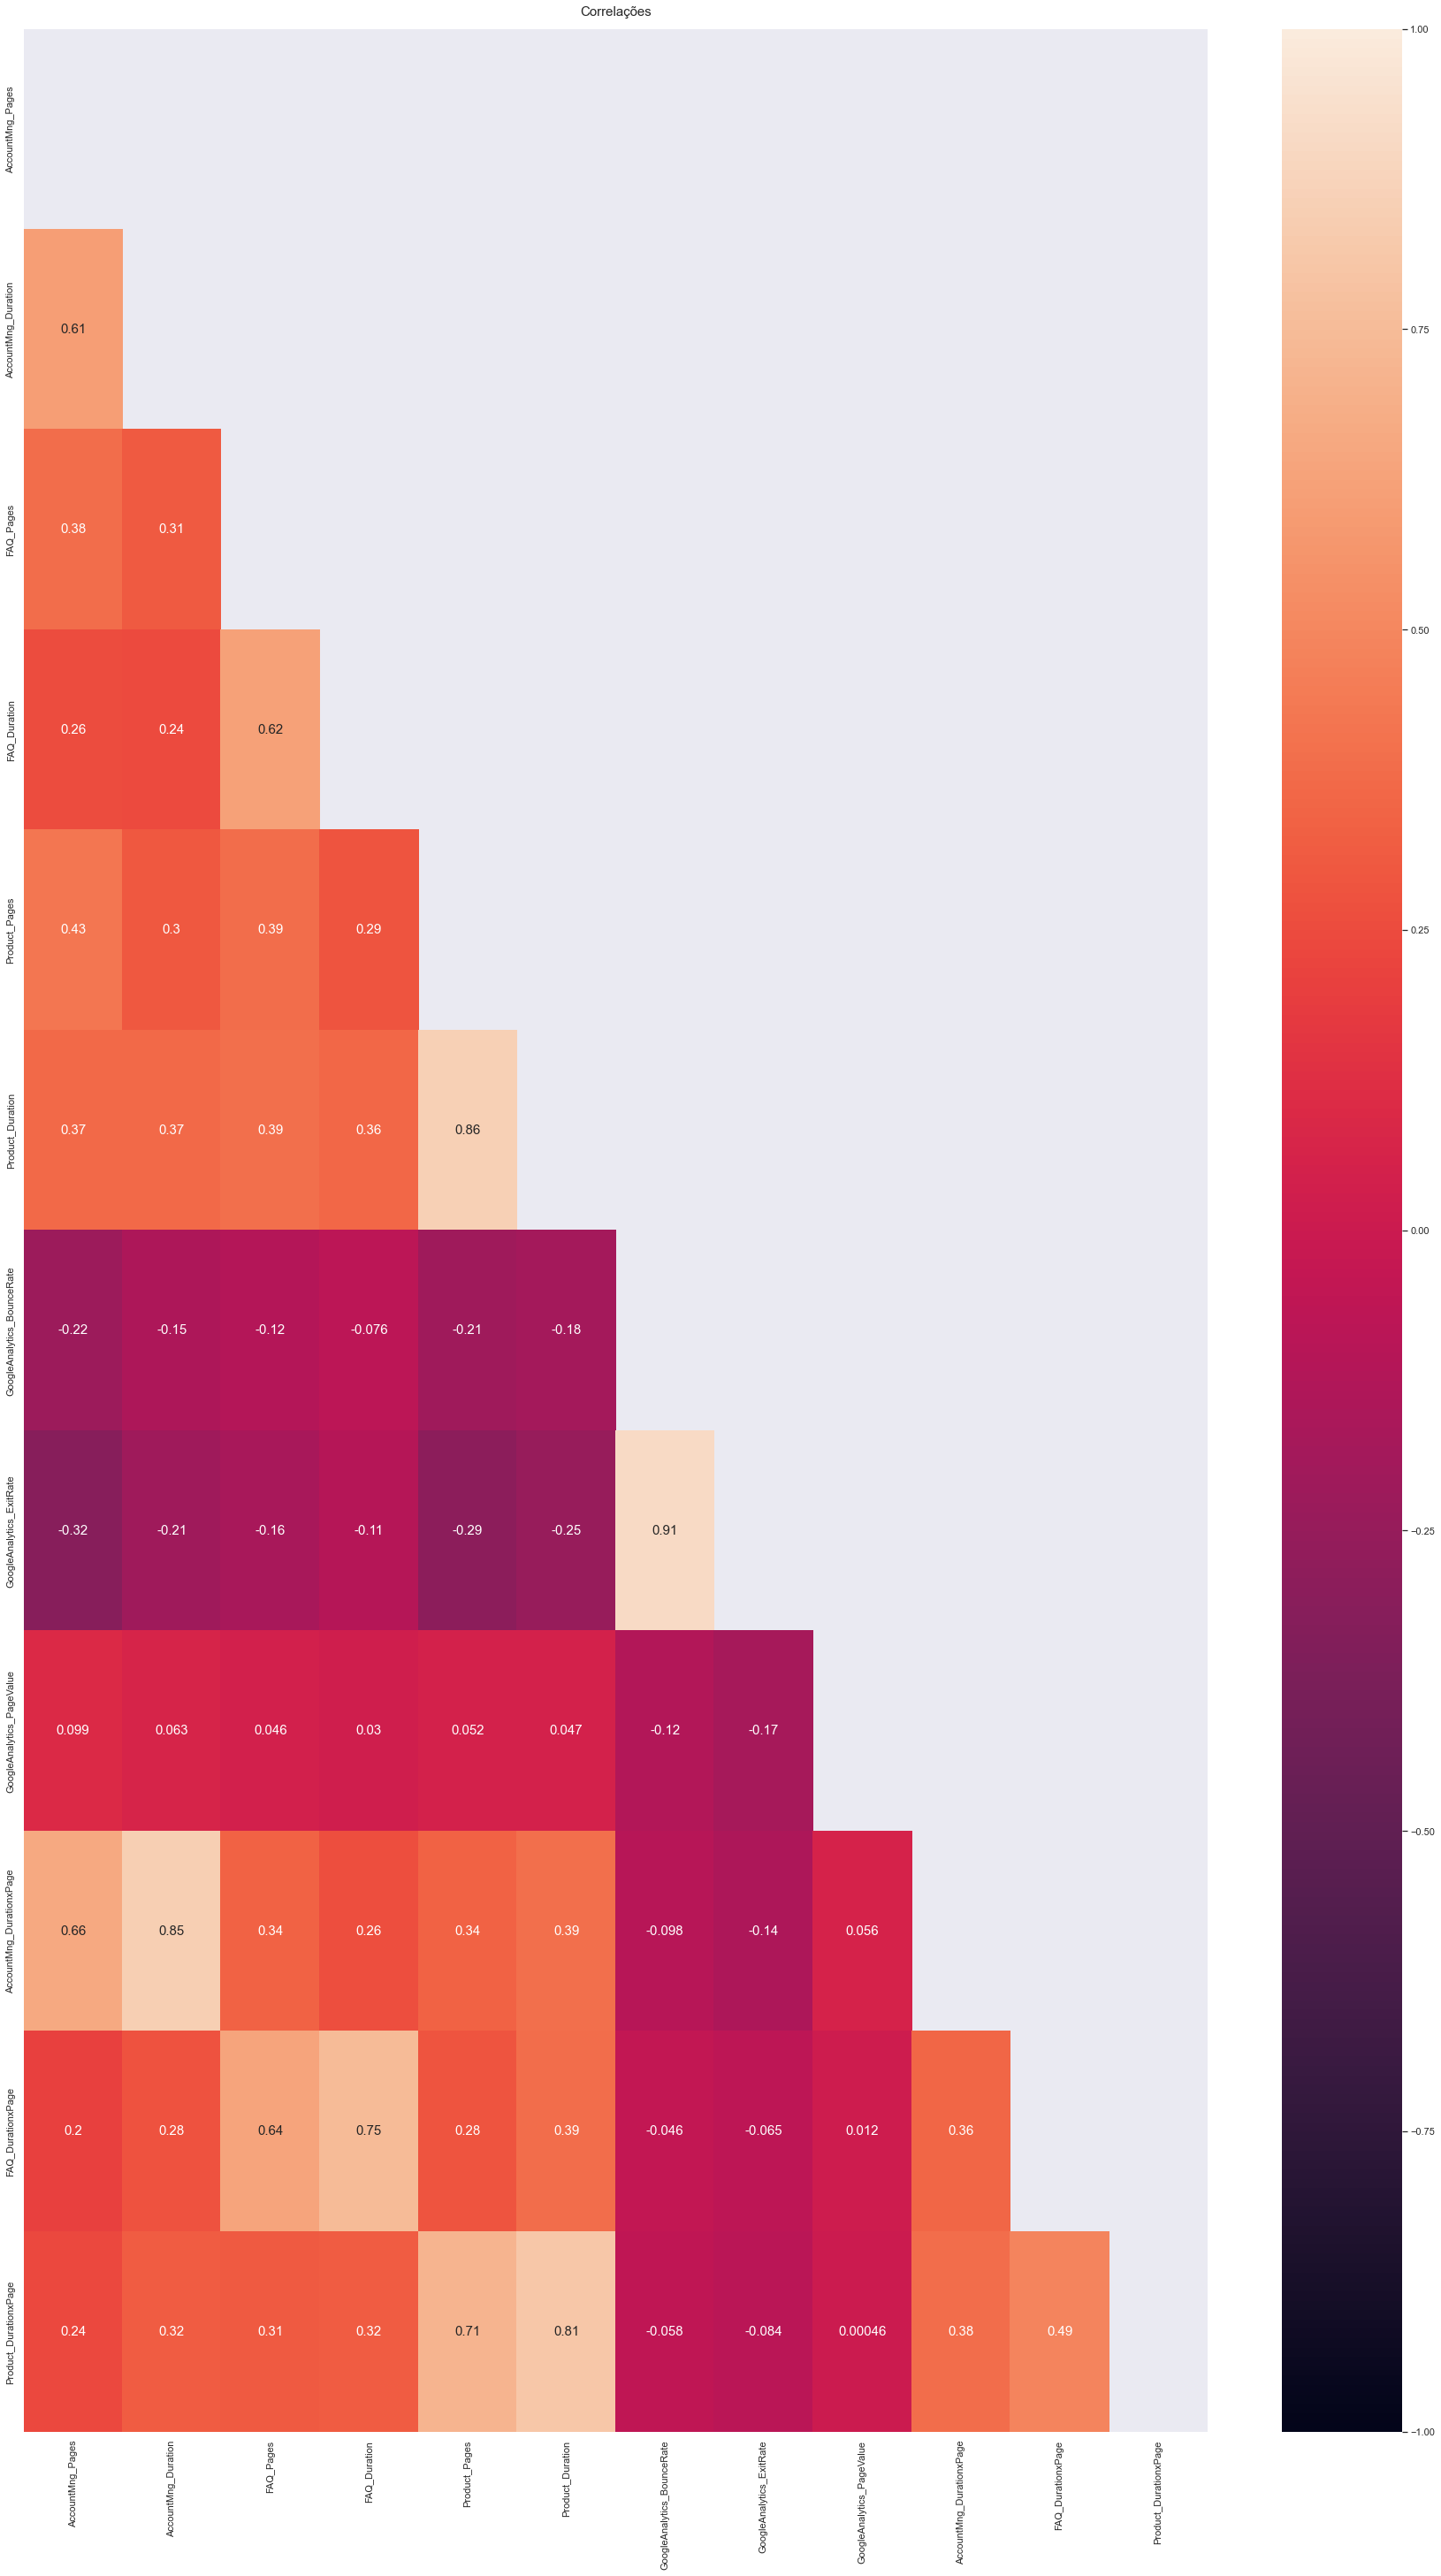

In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns
plt.figure(figsize=(30, 50))
matrix = np.triu(data[num_col].corr())
heatmap = sns.heatmap(data[num_col].corr(), vmin=-1, vmax=1, annot=True,mask=matrix, annot_kws={'size': 15})
heatmap.set_title('Correlações', fontdict={'fontsize':15}, pad=15);

In [46]:
# data_gaussian.columns

In [47]:
# data_gaussian = data_gaussian[['GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue','AccountMng_DurationxPage', 'FAQ_DurationxPage',
#        'Product_DurationxPage','OS', 'Browser', 'Type_of_Traffic',
#        'Type_of_Visitor', 'Month']]

In [48]:
# data.drop(['GoogleAnalytics_BounceRate','AccountMng_Duration','Product_Duration','Country'],axis=1,inplace=True)
data.drop(['Country'],axis=1,inplace=True)
data_notEncoded.drop(['Country'],axis=1,inplace=True)

#### Modeling

In [49]:
X=data.drop(columns=['Buy'],axis=1)
y=data['Buy']


### Feature Selection

#### RFE Selection

In [50]:
X_num=['AccountMng_Pages', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue','AccountMng_DurationxPage', 'FAQ_DurationxPage',
       'Product_DurationxPage']

In [51]:
# # from sklearn.feature_selection import SequentialFeatureSelector
# # from sklearn.feature_selection import RFECV
# # from sklearn.ensemble import RandomForestClassifier
# # from sklearn.linear_model import LogisticRegression
# # from sklearn.feature_selection import RFE
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import f1_score

# # DO IT
# model = RandomForestClassifier(random_state=0)
# model

# X_train, X_val, y_train, y_val = train_test_split(X[X_num],
# y,
# test_size=0.25,
# stratify = y,
# random_state=15
# )


# #no of features
# nof_list=np.arange(1,7)
# high_score=0
# #Variable to store the optimum features
# nof=0
# score_list =[]
# for n in range(len(nof_list)):
#     model = RandomForestClassifier(random_state=0)
#     a=nof_list[n]
#     rfe = RFE(model,n_features_to_select=a)
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_val_rfe = rfe.transform(X_val)
#     model.fit(X_train_rfe,y_train)

#     val_pred = model.predict(X_val_rfe)
#     score=f1_score(y_val,val_pred)
#     score_list.append(score)

#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))



In [52]:
# rfe = RFE(model,n_features_to_select=5)

# x_rfe=rfe.fit_transform(X = X[X_num] , y = y)

# pd.concat([pd.DataFrame(X[X_num].columns ,columns={'Columns'}),pd.DataFrame(rfe.support_, columns={'RFE Result'}),pd.DataFrame(rfe.ranking_ , columns={'Ranking'})],axis=1)

In [53]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [54]:
# rfecv = RFECV(model,min_features_to_select=1,cv=cv,scoring='f1')


# x_rfecv=rfecv.fit_transform(X = X[X_num] , y = y)

# pd.concat([pd.DataFrame(X[X_num].columns ,columns={'Columns'}),pd.DataFrame(rfecv.support_, columns={'RFECV Result'}),pd.DataFrame(rfecv.ranking_ , columns={'Ranking'})],axis=1)

#### Lasso Selection 

In [55]:
# # from sklearn.linear_model import LassoCV
# def plot_importance_lasso(coef,name):
#     imp_coef = coef.sort_values()
#     plt.figure(figsize=(8,10))
#     imp_coef.plot(kind = "barh")
#     plt.title("Feature importance using " + name + " Model")
#     plt.show()

In [56]:

# reg = LassoCV(normalize=True)

# reg.fit(X_train, y_train)


# coef = pd.Series(np.round(reg.coef_,2), index = X_train.columns)
# print(coef)



# plot_importance_lasso(coef,'Lasso')

In [57]:
# data=data[['AccountMng_Pages', 'Product_Pages',
#        'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Weekend', 'AccountMng_DurationxPage', 'FAQ_DurationxPage',
#        'Product_DurationxPage', 'x0_Android', 'x0_Chrome OS', 'x0_Fedora',
#        'x0_MacOSX', 'x0_Other', 'x0_Ubuntu', 'x0_Windows', 'x0_iOS', 'x1_1',
#        'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_10',
#        'x1_11', 'x1_12', 'x1_13', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5',
#        'x2_6', 'x2_7', 'x2_8', 'x2_9', 'x2_10', 'x2_11', 'x2_12', 'x2_13',
#        'x2_14', 'x2_15', 'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_02',
#        'x4_03', 'x4_05', 'x4_06', 'x4_07', 'x4_08', 'x4_09', 'x4_10', 'x4_11',
#        'x4_12']]
data.drop(['Buy','WeekDay','Day','Year'],axis=1,inplace=True)
data_notEncoded.drop(['Buy','WeekDay','Year'],axis=1,inplace=True)
# data.drop(['Buy', 'Year','WeekDay'],axis=1,inplace=True)
data['Weekend']=data['Weekend'].astype(float)
data_notEncoded['Weekend']=data_notEncoded['Weekend'].astype(object)

### Model Using selected Features

##### Model Gaussian NB MIX

In [58]:
# xgaussiana_num=data_gaussian[['GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue','AccountMng_DurationxPage', 'FAQ_DurationxPage','Product_DurationxPage']]
# xgaussiana_cat=data_gaussian[['OS', 'Browser', 'Type_of_Traffic','Type_of_Visitor', 'Month']]

In [59]:
# # from sklearn.model_selection import cross_validate
# # from sklearn import model_selection
# # from sklearn import metrics
# # from sklearn.naive_bayes import GaussianNB
# # from sklearn.naive_bayes import CategoricalNB

# model_G = GaussianNB()

# model_C = CategoricalNB()


# cv_results_modelg=model_selection.cross_val_score(model_G,xgaussiana_num,y,cv=cv,scoring='f1')
# print('O fscore da validação do modelo NB das numericas é ',np.mean(cv_results_modelg))
    
# cv_results_modelc=model_selection.cross_val_score(model_C,xgaussiana_cat,y,cv=cv,scoring='f1')
# print('O fscore da validação do modelo NB das categóricas é ',np.mean(cv_results_modelc))
    
    

    
# #result_df=pd.DataFrame({'Model':names_a,
#                         #'F1 Score':f1_score_a})

In [60]:
# model_G = GaussianNB(var_smoothing=0.0015)

# model_C = CategoricalNB()

In [61]:
# # from sklearn.model_selection import train_test_split
# X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(xgaussiana_num, y, test_size=0.3, random_state=3)

# X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(xgaussiana_cat, y, test_size=0.3, random_state=3)

In [62]:
# # from sklearn.preprocessing import MinMaxScaler
# #Train
# scaler = MinMaxScaler().fit(X_train_num)
# columns=X_train_num.columns
# idx=X_train_num.index
# X_train_num = scaler.transform(X_train_num) # this will return an array
# X_train_num = pd.DataFrame(X_train_num, columns = columns,index=idx)
# #Val
# idx=X_test_num.index
# X_test_num = scaler.transform(X_test_num)
# X_test_num = pd.DataFrame(X_test_num, columns = columns).set_index(idx)

In [63]:
# # from sklearn.metrics import classification_report
# # ----- Get probability predictions from each model -----
# # On training data
# model_G.fit(X_train_num,y_train_num)
# model_C.fit(X_train_cat,y_train_cat)


# G_train_probas = model_G.predict_proba(X_train_num)
# C_train_probas = model_C.predict_proba(X_train_cat)
# # And on testing data
# G_test_probas = model_G.predict_proba(X_test_num)
# C_test_probas = model_C.predict_proba(X_test_cat)

# # Combine probability prediction for class=1 from both models into a 2D array
# X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
# X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])] # Test


# # ----- Fit Gaussian model on the X_new -----
# model = GaussianNB(var_smoothing=0.0015)
# clf = model.fit(X_new_train, y_train_num)

# # Predict class labels on a test data
# pred_labels = model.predict(X_new_test)


# # ----- Print results -----
# print('Classes: ', clf.classes_) # class labels known to the classifier
# print('Class Priors: ',clf.class_prior_) # probability of each class.
# # Use score method to get accuracy of model
# print('--------------------------------------------------------')
# score = f1_score(y_test_num, pred_labels)
# print('F1 Score: ', score)
# print('--------------------------------------------------------')
# # Look at classification report to evaluate the model
# print(classification_report(y_test_num, pred_labels))

## Scaling

In [64]:
ss=MinMaxScaler()
Xs=ss.fit_transform(data)

## Other Models

In [65]:
# from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
# explicitly require this experimental feature
# from sklearn.experimental import enable_hist_gradient_boosting

# from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=0)

# from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)

# from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

# from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)

# from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

# from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
bc=BaggingClassifier(random_state=0)

# from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=0)

# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier
histgbm = HistGradientBoostingClassifier(random_state=1)


# from sklearn import svm
svc=svm.SVC(random_state=0)

In [66]:
# from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Hyperparameter Tuning of Random Forest


In [67]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint

rfc_tunned=RandomForestClassifier(random_state=0)
params={'n_estimators':sp_randint(1,200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(2,20),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(1,30),
        'criterion':['gini','entropy']}

rsearch_rfc=RandomizedSearchCV(rfc_tunned,params,cv=cv,scoring='f1',n_jobs=-1)

rsearch_rfc.fit(Xs,y)

In [68]:
rfc_tunned=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=0)

#### Hyperparameter Tuning of KNN

In [69]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# from scipy.stats import randint as sp_randint

knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,40),'p':sp_randint(1,10)}

rsearch_knn=RandomizedSearchCV(knn_tunned,params,cv=cv,scoring='f1',n_jobs=-1)
rsearch_knn.fit(Xs,y)

In [70]:
knn_tunned=KNeighborsClassifier(**rsearch_knn.best_params_)

#### Hyperparameter Tuning of SVC

In [71]:
# from sklearn import svm
SVM_tunned=svm.SVC(random_state=0)
params = {'C': [0.1, 1, 10, 100, 1000], 
          'degree': sp_randint(1,15),
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
          'kernel': ['rbf'],
        'class_weight': [{0:1,1: 1}, {0:1,1: 2},{0:1,1: 3}, {0:1,1:4}] }

rsearch_svm=RandomizedSearchCV(SVM_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

rsearch_svm.fit(Xs,y)

In [72]:
SVM_tunned=svm.SVC(**rsearch_svm.best_params_,random_state=0)

#### Hyperparameter Tuning MLP Classifier

In [73]:
# from sklearn.neural_network import MLPClassifier
MLP_tunned = MLPClassifier(random_state=0)

params = {'hidden_layer_sizes': [50,100,200,500], 
          'activation': ['identity','logistic','tanh','relu'],
          'solver': ['sgd','adam'], 
          'learning_rate': ['constant','adaptative','invscaling'],
        'learning_rate_init': [0.001,0.005,0.01] }

rsearch_mlp=RandomizedSearchCV(MLP_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

rsearch_mlp.fit(Xs,y)

In [74]:
mlp_tunned=MLPClassifier(**rsearch_mlp.best_params_,random_state=0)

#### Hyperparameter Tuning GradientBoosting

In [75]:
gbm_tunned = GradientBoostingClassifier(random_state=0)

params = {'n_estimators':sp_randint(1,200), 
                  'max_features': sp_randint(1,43),
                  'max_depth': sp_randint(2,20),
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15],
                  'loss': ['deviance', 'exponential'],
                  'learning_rate':[0.01,0.1,0.5],
                  'subsample':[0.7, 0.8,0.9, 1]} 

rsearch_gbm=RandomizedSearchCV(gbm_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

rsearch_gbm.fit(Xs,y)

In [76]:
gb_tunned=GradientBoostingClassifier(**rsearch_gbm.best_params_,random_state=0)

#### Hyperparameter Tuning AdaBoost

In [77]:
adb_tunned = AdaBoostClassifier(random_state=0)

params = {'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
'learning_rate':[0.4,0.5],
'n_estimators':[10,40,41,45],
'algorithm': ["SAMME","SAMME.R"]
} 

rsearch_adb=RandomizedSearchCV(adb_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

rsearch_adb.fit(Xs,y)

In [78]:
adab_tunned=AdaBoostClassifier(**rsearch_adb.best_params_,random_state=0)

#### Hyperparameter Hist Gradient Boosting Classifier

In [79]:
histgbm_tunned = HistGradientBoostingClassifier(random_state=1)

histgbm_param_grid = {'learning_rate':[0.01,0.05,0.1,0.5] ,
'max_leaf_nodes': sp_randint(1,43),
'max_depth': sp_randint(2,20),
'min_samples_leaf': [1,2,7,15,20],
'l2_regularization':[0,0.05,0.1]
}

rsearch_histgb = RandomizedSearchCV(
estimator=histgbm, param_distributions=histgbm_param_grid, cv=cv, refit=True,scoring='f1', n_jobs=1,
random_state=1)

rsearch_histgb.fit(Xs,y)

In [80]:
histgbm_tunned=HistGradientBoostingClassifier(**rsearch_histgb.best_params_,random_state=1)

### Voting Classifier

In [81]:
# from sklearn.ensemble import VotingClassifier

soft_voting=VotingClassifier(estimators=[('Ada-Boost Tuned',adab_tunned),('Random Forest Tunned',rfc_tunned),('Gradient Boost Tuned',gb_tunned)],voting='hard')

weighted_soft=VotingClassifier(estimators=[('KNN',knn),('Gradient Boost Tuned',gb_tunned),('Random Forest Tuned',rfc_tunned)],weights=[1,2,2],voting='hard')

### Model Comparision

In [82]:
models_a=[]
models_a.append(('Logistic',LR))
models_a.append(('Decision Tree',dt))
models_a.append(('MLP Classifier',clf))
models_a.append(('MLP Classifier Tuned',mlp_tunned))
models_a.append(('Random Forest',rfc))
models_a.append(('Random Forest Tuned',rfc_tunned))
models_a.append(('KNN',knn))
models_a.append(('KNN Tuned',knn_tunned))
models_a.append(('Bagging',bc))
models_a.append(('Ada-Boost',ada))
models_a.append(('Ada-Boost Tuned',adab_tunned))
models_a.append(('Gradient Boost',gb))
models_a.append(('Gradient Boost Tuned',gb_tunned))
models_a.append(('Soft Voting',soft_voting))
models_a.append(('Weighted Soft Voting',weighted_soft))
models_a.append(('SVM',svc))
models_a.append(('SVM Tuned',SVM_tunned))
models_a.append(('HistGradientBoostingClassifierd',histgbm))
models_a.append(('HistGradientBoostingClassifierd Tunned',histgbm_tunned))

In [83]:
# from sklearn.model_selection import cross_val_score
# from sklearn import model_selection
# from sklearn import metrics
# from sklearn.model_selection import train_test_split

# results_a=[]
# acc_score_a=[]
# auc_score_a=[]
# bias_a=[]
f1_sc=[]
f1_score_a=[]
# precision_score_a=[]
# recall_score_a=[]
names_a=[]
for name,model in models_a:
    
    f1=model_selection.cross_val_score(model,Xs,y,cv=cv,scoring='f1')
    f1_score_a.append(np.mean(f1))
    f1_sc.append(f1)
    
    
    names_a.append(name)
    
    result_df=pd.DataFrame({'Model':names_a,'F1 Score':f1_score_a})

In [84]:
result_df

In [85]:
# boxplot algorithm comparison

fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(f1_sc)
#ax.set_xticks()
ax.set_xticklabels(names_a, rotation=90)
plt.show()

## Tunning Adaboost

In [86]:
# from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.3, random_state=3,stratify=y)

In [87]:
# from matplotlib.legend_handler import HandlerLine2D

max_depth = np.arange(1,11)
train_results = []
test_results = []
diff=[]

for depth in max_depth:
    rf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth))
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = f1_score(y_train,train_pred)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = f1_score(y_val,test_pred)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(max_depth, train_results, 'b', label='Train F1')
line2, = plt.plot(max_depth, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('max_depth')
plt.show()

In [88]:
n_estimators = np.arange(15, 31)
train_results = []
test_results = []
diff=[]

for estimator in n_estimators:
    rf = AdaBoostClassifier(n_estimators=estimator)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = f1_score(y_train,train_pred)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = f1_score(y_val,test_pred)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train F1')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.show()

In [89]:
learnin_rate = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5]
train_results = []
test_results = []
diff=[]

for l_rate in learnin_rate:
    rf = AdaBoostClassifier(learning_rate=l_rate)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = f1_score(y_train,train_pred)
    train_results.append(train_score)
    
    test_pred = rf.predict(X_val)
    val_score = f1_score(y_val,test_pred)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(learnin_rate, train_results, 'b', label='Train F1')
line2, = plt.plot(learnin_rate, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('learnin_rate')
plt.show()

In [90]:
algorithm = ["SAMME","SAMME.R"]
train_results = []
test_results = []
diff=[]

for alg in algorithm:
    rf = AdaBoostClassifier(algorithm=alg)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_score = f1_score(y_train,train_pred)
    train_results.append(train_score)
    1
    test_pred = rf.predict(X_val)
    val_score = f1_score(y_val,test_pred)
    test_results.append(val_score)
    diff.append(val_score-train_score)
    
line1, = plt.plot(algorithm, train_results, 'b', label='Train F1')
line2, = plt.plot(algorithm, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('algorithm')
plt.show()

In [91]:
# #Choose all predictors except target & IDcols
# predictors = [x for x in X_train.columns]
# param_test1 = {'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
#                 'learning_rate':[0.001,0.3,0.4],
#                'n_estimators':[17,21,25],
#                'algorithm': ["SAMME","SAMME.R"]
#               }
# gsearch_adab = GridSearchCV(estimator = AdaBoostClassifier(), 
#                     param_grid = param_test1, scoring='f1', 
#                     cv=cv)
# gsearch_adab.fit(X_train,y_train)

In [92]:
# gsearch_adab.best_params_

In [93]:
# train_pred=gsearch_adab.predict(X_train)
# val_pred=gsearch_adab.predict(X_val)
# print("Train F1 Score : %.5g" %(f1_score(y_train,train_pred)))
# print("Val F1 Score : %.5g" %(f1_score(y_val,val_pred)))

In [94]:
# best_ada=gsearch_adab.best_estimator_

### GradientBoosting gridsearchcv

In [95]:
# max_depth = np.arange(1,10)
# train_results = []
# test_results = []
# diff=[]

# for depth in max_depth:
#     rf = GradientBoostingClassifier(max_depth=depth)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_depth, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_depth, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_depth')
# plt.show()

In [96]:
# n_estimators = np.arange(30,46)
# train_results = []
# test_results = []
# diff=[]

# for estimator in n_estimators:
#     rf = GradientBoostingClassifier(n_estimators=estimator)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(n_estimators, train_results, 'b', label='Train F1')
# line2, = plt.plot(n_estimators, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('n_estimators')
# plt.show()

In [97]:
# learnin_rate = [0.01,0.05,0.1,0.2,0.3]
# train_results = []
# test_results = []
# diff=[]

# for l_rate in learnin_rate:
#     rf = GradientBoostingClassifier(learning_rate=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(learnin_rate, train_results, 'b', label='Train F1')
# line2, = plt.plot(learnin_rate, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('learnin_rate')
# plt.show()

In [98]:
# max_features = np.arange(6, 25)
# train_results = []
# test_results = []
# diff=[]

# for l_rate in max_features:
#     rf = GradientBoostingClassifier(max_features=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_features, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_features, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_features')
# plt.show()

In [99]:
# min_samples_split = np.arange(2, 22)
# train_results = []
# test_results = []
# diff=[]

# for l_rate in min_samples_split:
#     rf = GradientBoostingClassifier(min_samples_split=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(min_samples_split, train_results, 'b', label='Train F1')
# line2, = plt.plot(min_samples_split, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('min_samples_split')
# plt.show()

In [100]:
# min_samples_leaf = np.arange(1, 60)
# train_results = []
# test_results = []
# diff=[]

# for l_rate in min_samples_leaf:
#     rf = GradientBoostingClassifier(min_samples_leaf=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train F1')
# line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('min_samples_leaf')
# plt.show()

In [101]:
# sub_sample = np.arange(0.1,1.1,0.1)
# train_results = []
# test_results = []
# diff=[]

# for l_rate in sub_sample:
#     rf = GradientBoostingClassifier(subsample=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(sub_sample, train_results, 'b', label='Train F1')
# line2, = plt.plot(sub_sample, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('sub_sample')
# plt.show()

In [102]:
# #Choose all predictors except target & IDcols
# predictors = [x for x in X_train.columns]
# params = {'n_estimators':[35,42,44], 
#                   'max_features': [18,22,23],
#                   'max_depth': [2,3,4],
#                   'min_samples_split': [4,20],
#                   'min_samples_leaf': [39,51],
#                   'loss': ['deviance', 'exponential'],
#                   'learning_rate':[0.05,0.1],
#                   'subsample':[0.7,1]}

# gsearch_gbm = GridSearchCV(estimator = GradientBoostingClassifier(), 
#                     param_grid = params, scoring='f1', 
#                     cv=cv)
# gsearch_gbm.fit(X_train,y_train)

 

In [103]:
# gsearch_gbm.best_params_

In [104]:
# train_pred=gsearch_gbm.predict(X_train)
# val_pred=gsearch_gbm.predict(X_val)
# print("Train F1 Score : %.5g" %(f1_score(y_train,train_pred)))
# print("Val F1 Score : %.5g" %(f1_score(y_val,val_pred)))

In [105]:
# best_gb=gsearch_gbm.best_estimator_

### Hyperparameter Tunning Random Forest

In [106]:
# max_depth = np.arange(5,15)
# train_results = []
# test_results = []
# diff=[]

# for depth in max_depth:
#     rf = RandomForestClassifier(max_depth=depth)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_depth, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_depth, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_depth')
# plt.show()

In [107]:
# n_estimators = np.arange(1,21)
# train_results = []
# test_results = []
# diff=[]

# for estimator in n_estimators:
#     rf = RandomForestClassifier(n_estimators=estimator)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(n_estimators, train_results, 'b', label='Train F1')
# line2, = plt.plot(n_estimators, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('n_estimators')
# plt.show()

In [108]:
# #max_features = np.arange(5,40)
# max_features = np.arange(0,1.05,0.05)[1:]
# train_results = []
# test_results = []
# diff=[]

# for l_rate in max_features:
#     rf = RandomForestClassifier(max_features=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_features, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_features, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_features')
# plt.show()

In [109]:
# min_samples_split = np.arange(2, 30)
# train_results = []
# test_results = []
# diff=[]

# for l_rate in min_samples_split:
#     rf = RandomForestClassifier(min_samples_split=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(min_samples_split, train_results, 'b', label='Train F1')
# line2, = plt.plot(min_samples_split, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('min_samples_split')
# plt.show()

In [110]:
# min_samples_leaf = np.arange(1, 15)
# train_results = []
# test_results = []
# diff=[]

# for l_rate in min_samples_leaf:
#     rf = RandomForestClassifier(min_samples_leaf=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train F1')
# line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('min_samples_leaf')
# plt.show()

In [111]:
# max_sample = np.arange(0,1,0.05)[1:]
# train_results = []
# test_results = []
# diff=[]

# for l_rate in max_sample:
#     rf = RandomForestClassifier(max_samples=l_rate)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_sample, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_sample, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_sample')
# plt.show()

In [112]:
# w_0 = 0.1
# w_1 = np.arange(0.1,0.51,0.01)
# train_results = []
# test_results = []
# diff=[]

# for w in w_1:
#     rf = RandomForestClassifier(class_weight={0: w_0, 1: w})
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(w_1, train_results, 'b', label='Train F1')
# line2, = plt.plot(w_1, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('Class 1 Weight ')
# plt.show()

In [113]:
# #Choose all predictors except target & IDcols
# predictors = [x for x in X_train.columns]
# params={'n_estimators':[11,17,19],
#         #'max_features':[11,26],
#         'max_features':[0.5,0.65,0.8],
#         'max_depth': [10,11],
#         'min_samples_split':[19,24,28],
#         'min_samples_leaf':[4,6,8],
#         'max_samples': [0.15,0.35],
#         'criterion':['gini','entropy'],
#        'class_weight':[{0:0.1, 1: 0.3},{0:0.1, 1: 0.20},{0:0.1, 1: 0.25}]
#        }

# gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(), 
#                     param_grid = params, scoring='f1', 
#                     cv=cv , return_train_score=True)
# gsearch_rf.fit(X_train,y_train)


In [114]:
# train_pred=gsearch_rf.predict(X_train)
# val_pred=gsearch_rf.predict(X_val)
# print("Train F1 Score : %.5g" %(f1_score(y_train,train_pred)))
# print("Val F1 Score : %.5g" %(f1_score(y_val,val_pred)))

In [115]:
# gsearch_rf.best_params_

In [116]:
# pd.DataFrame(gsearch_rf.cv_results_)[['rank_test_score','mean_test_score','mean_train_score']].sort_values(by='rank_test_score')[:5]


In [117]:
# pd.DataFrame(gsearch_rf.cv_results_).sort_values(by='rank_test_score')

In [118]:
# best_rf=gsearch_rf.best_estimator_

## Hyperparameter Tunning Hist Gradient

In [119]:
# loss = ['auto','binary_crossentropy']
# train_results = []
# test_results = []
# diff=[]

# for l in loss:
#     rf = HistGradientBoostingClassifier(loss=l)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(loss, train_results, 'b', label='Train F1')
# line2, = plt.plot(loss, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('loss')
# plt.show()

In [120]:
# learning_rate = np.arange(0,0.15,0.01)[1:]
# train_results = []
# test_results = []
# diff=[]

# for l in learning_rate:
#     rf = HistGradientBoostingClassifier(learning_rate=l)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(learning_rate, train_results, 'b', label='Train F1')
# line2, = plt.plot(learning_rate, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('learning_rate')
# plt.show()

In [121]:
# max_iter = np.arange(10,75,5)
# train_results = []
# test_results = []
# diff=[]

# for i in max_iter:
#     rf = HistGradientBoostingClassifier(max_iter=i)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_iter, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_iter, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_iter')
# plt.show()

In [122]:
# max_leaf_nodes = np.arange(2,22)
# train_results = []
# test_results = []
# diff=[]

# for i in max_leaf_nodes:
#     rf = HistGradientBoostingClassifier(max_leaf_nodes=i)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_leaf_nodes, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_leaf_nodes, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_leaf_nodes')
# plt.show()

In [123]:
# max_depth = np.arange(1,15)
# train_results = []
# test_results = []
# diff=[]

# for i in max_depth:
#     rf = HistGradientBoostingClassifier(max_depth=i)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_depth, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_depth, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_depth')
# plt.show()

In [124]:
# min_samples_leaf = np.arange(0,500,10)[1:]
# train_results = []
# test_results = []
# diff=[]

# for i in min_samples_leaf:
#     rf = HistGradientBoostingClassifier(min_samples_leaf=i)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train F1')
# line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('min_samples_leaf')
# plt.show()

In [125]:
# df_min_samples_leafs=pd.DataFrame([pd.Series(min_samples_leaf,name='min_samples_leaf',dtype=int),pd.Series(train_results,name='Train'),pd.Series(test_results,name='Val'),pd.Series(diff,name='Diff')]).T
# df_min_samples_leafs.sort_values(by='Val',ascending=False).iloc[:5]

In [126]:
# l2_regularization = np.arange(0,50,0.5)
# train_results = []
# test_results = []
# diff=[]

# for i in l2_regularization:
#     rf = HistGradientBoostingClassifier(l2_regularization=i)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(l2_regularization, train_results, 'b', label='Train F1')
# line2, = plt.plot(l2_regularization, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('l2_regularization')
# plt.show()

In [127]:
# max_bins = np.arange(5,260,5)
# train_results = []
# test_results = []
# diff=[]

# for i in max_bins:
#     rf = HistGradientBoostingClassifier(max_bins=i)
#     rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
#     train_score = f1_score(y_train,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val)
#     val_score = f1_score(y_val,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_bins, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_bins, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_bins')
# plt.show()

In [128]:
# params = {
#     'loss':['auto','binary_crossentropy'],
#     'learning_rate':[0.06,0.1],
#     'max_iter':[25,30,40],
#     'max_leaf_nodes':[7,10,14],
#     'max_depth':[3,4,5],
#     'min_samples_leaf':[160,210],
#     'l2_regularization':[0,15,18],
#     'max_bins':[15,95,165,255]
# }

# gsearch_hgb = GridSearchCV(estimator = HistGradientBoostingClassifier(), 
#                     param_grid = params, scoring='f1', 
#                     cv=cv , return_train_score=True)
# gsearch_hgb.fit(X_train,y_train)

In [129]:
# train_pred=gsearch_hgb.predict(X_train)
# val_pred=gsearch_hgb.predict(X_val)
# print("Train F1 Score : %.5g" %(f1_score(y_train,train_pred)))
# print("Val F1 Score : %.5g" %(f1_score(y_val,val_pred)))

In [130]:
# gsearch_hgb.best_params_

In [131]:
# pd.DataFrame(gsearch_hgb.cv_results_)[['rank_test_score','mean_test_score','mean_train_score']].sort_values(by='rank_test_score')[:5]

In [132]:
# pd.DataFrame(gsearch_hgb.cv_results_).sort_values(by='rank_test_score')

In [133]:
# best_hgb=gsearch_hgb.best_estimator_

### Using a Dataset not encoded for Hist Gradient Boosting

In [134]:
# ordencoder = OrdinalEncoder()
# cat_var=['OS','Browser','Type_of_Traffic','Type_of_Visitor','Month','Weekend']
# transformed_Date=ordencoder.fit_transform(data_notEncoded[cat_var])
# transformed_Date=pd.DataFrame(transformed_Date,columns=cat_var)

# data_notEncoded.drop(cat_var,axis=1,inplace=True)
# data_notEncoded=pd.concat([data_notEncoded,transformed_Date],axis=1)

# # data_notEncoded['OS'] = ordencoder.fit_transform(data_notEncoded['OS'])
# # data_notEncoded['Browser'] = ordencoder.fit_transform(data_notEncoded['Browser'])
# # data_notEncoded['Type_of_Traffic'] = ordencoder.fit_transform(data_notEncoded['Type_of_Traffic'])
# # data_notEncoded['Type_of_Visitor'] = ordencoder.fit_transform(data_notEncoded['Type_of_Visitor'])
# # data_notEncoded['Month'] = ordencoder.fit_transform(data_notEncoded['Month'])
# # data_notEncoded['Weekend'] = ordencoder.fit_transform(data_notEncoded['Weekend'])

In [135]:
# X_train_notEncoded, X_val_notEncoded, y_train_notEncoded, y_val_notEncoded = train_test_split(data_notEncoded,
#                                                                             y,
#                                                                             test_size=0.25,
#                                                                             stratify = y,
#                                                                             random_state=15
#                                                                             )

In [136]:
# idx_cat_features=np.where(np.isin(data_notEncoded.columns,cat_var))
# # print(idx_cat_features)

In [137]:
# loss = ['auto','binary_crossentropy']
# train_results = []
# test_results = []
# diff=[]

# for l in loss:
#     rf = HistGradientBoostingClassifier(loss=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(loss, train_results, 'b', label='Train F1')
# line2, = plt.plot(loss, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('loss')
# plt.show()

In [138]:
# learning_rate = np.arange(0,0.15,0.01)[1:]
# train_results = []
# test_results = []
# diff=[]

# for l in learning_rate:
#     rf = HistGradientBoostingClassifier(learning_rate=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(learning_rate, train_results, 'b', label='Train F1')
# line2, = plt.plot(learning_rate, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('learning_rate')
# plt.show()

In [139]:
# max_iter = np.arange(0,50,5)[1:]
# train_results = []
# test_results = []
# diff=[]

# for l in max_iter:
#     rf = HistGradientBoostingClassifier(max_iter=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_iter, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_iter, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_iter')
# plt.show()

In [140]:
# max_leaf_nodes = np.arange(2,25)
# train_results = []
# test_results = []
# diff=[]

# for l in max_leaf_nodes:
#     rf = HistGradientBoostingClassifier(max_leaf_nodes=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_leaf_nodes, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_leaf_nodes, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_leaf_nodes')
# plt.show()

In [141]:
# max_depth = np.arange(1,8)
# train_results = []
# test_results = []
# diff=[]

# for l in max_depth:
#     rf = HistGradientBoostingClassifier(max_depth=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_depth, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_depth, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_depth')
# plt.show()

In [142]:
# min_samples_leaf = np.arange(0,300,10)[1:]
# train_results = []
# test_results = []
# diff=[]

# for l in min_samples_leaf:
#     rf = HistGradientBoostingClassifier(min_samples_leaf=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train F1')
# line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('min_samples_leaf')
# plt.show()

In [143]:
# l2_regularization = np.arange(0,30)
# train_results = []
# test_results = []
# diff=[]

# for l in l2_regularization:
#     rf = HistGradientBoostingClassifier(l2_regularization=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(l2_regularization, train_results, 'b', label='Train F1')
# line2, = plt.plot(l2_regularization, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('l2_regularization')
# plt.show()

In [144]:
# max_bins = np.arange(200,240)
# train_results = []
# test_results = []
# diff=[]

# for l in max_bins:
#     rf = HistGradientBoostingClassifier(max_bins=l,categorical_features=idx_cat_features)
#     rf.fit(X_train_notEncoded, y_train_notEncoded)
#     train_pred = rf.predict(X_train_notEncoded)
#     train_score = f1_score(y_train_notEncoded,train_pred)
#     train_results.append(train_score)
    
#     test_pred = rf.predict(X_val_notEncoded)
#     val_score = f1_score(y_val_notEncoded,test_pred)
#     test_results.append(val_score)
#     diff.append(val_score-train_score)
    
# line1, = plt.plot(max_bins, train_results, 'b', label='Train F1')
# line2, = plt.plot(max_bins, test_results, 'r', label='Test F1')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('F1 Score')
# plt.xlabel('max_bins')
# plt.show()

In [145]:
# params = {
#     'loss':['binary_crossentropy'],
#     'learning_rate':[0.05,0.12],
#     'max_iter':[20,25,40],
#     'max_leaf_nodes':[6,8,23],
#     'max_depth':[3,4],
#     'min_samples_leaf':[90,150],
#     'l2_regularization':[0,12,28],
#     'max_bins':[24,106,243,255]
# }

# gsearch_hgb_withCat = GridSearchCV(estimator = HistGradientBoostingClassifier(categorical_features=idx_cat_features), 
#                     param_grid = params, scoring='f1', 
#                     cv=cv , return_train_score=True)
# gsearch_hgb_withCat.fit(X_train_notEncoded,y_train_notEncoded)

In [146]:
# train_pred=gsearch_hgb_withCat.predict(X_train_notEncoded)
# val_pred=gsearch_hgb_withCat.predict(X_val_notEncoded)
# print("Train F1 Score : %.5g" %(f1_score(y_train_notEncoded,train_pred)))
# print("Val F1 Score : %.5g" %(f1_score(y_val_notEncoded,val_pred)))

In [147]:
# gsearch_hgb_withCat.best_params_

In [148]:
# pd.DataFrame(gsearch_hgb_withCat.cv_results_)[['rank_test_score','mean_test_score','mean_train_score']].sort_values(by='rank_test_score')

In [149]:
# pd.DataFrame(gsearch_hgb_withCat.cv_results_).sort_values(by='rank_test_score')

## Voting Using Best Models

In [150]:
best_soft_voting=VotingClassifier(estimators=[('Ada-Boost Tuned',best_ada),('Random Forest Tunned',best_rf),('Gradient Boost Tuned',best_gb),('Hist Gradient Boost Tuned',best_hgb)],voting='hard')

best_weighted_soft=VotingClassifier(estimators=[('Ada-Boost Tuned',best_ada),('Random Forest Tunned',best_rf),('Gradient Boost Tuned',best_gb),('Hist Gradient Boost Tuned',best_hgb)],weights=[1,2,2,2.5],voting='hard')

In [151]:
#No weighted
best_soft_voting.fit(X_train,y_train)
train_pred=best_soft_voting.predict(X_train)
val_pred=best_soft_voting.predict(X_val)
print("Train F1 Score : %.5g" %(f1_score(y_train,train_pred)))
print("Val F1 Score : %.5g" %(f1_score(y_val,val_pred)))

In [152]:
#Weighted
best_weighted_soft.fit(X_train,y_train)
train_pred=best_weighted_soft.predict(X_train)
val_pred=best_weighted_soft.predict(X_val)
print("Train F1 Score : %.5g" %(f1_score(y_train,train_pred)))
print("Val F1 Score : %.5g" %(f1_score(y_val,val_pred)))

In [153]:
#Defining a random_state to the models
rs=51 # 1 51 59 24000
best_ada.set_params(random_state=rs)
best_rf.set_params(random_state=rs)
best_gb.set_params(random_state=rs)
best_hgb.set_params(random_state=rs)

In [154]:
w_range = np.arange(0,2.5,0.5)[1:]
w0_list=[]
w1_list=[]
w2_list=[]
w3_list=[]
w4_list=[]
f1_train=[]
f1_val=[]

for w0 in w_range:
    for w1 in w_range:
        for w2 in w_range:
            for w3 in w_range:
                #for w4 in w_range:
                local_best_weighted_soft=VotingClassifier(estimators=[('Ada-Boost Tuned',best_ada),('Random Forest Tunned',best_rf),('Gradient Boost Tuned',best_gb),('Hist Gradient Boost Tuned',best_hgb)],weights=[w0,w1,w2,w3],voting='soft')
                local_best_weighted_soft.fit(X_train,y_train)
                train_pred=local_best_weighted_soft.predict(X_train)
                val_pred=local_best_weighted_soft.predict(X_val)
                f1_train.append(f1_score(y_train,train_pred))
                f1_val.append(f1_score(y_val,val_pred))
                w0_list.append(w0)
                w1_list.append(w1)
                w2_list.append(w2)
                w3_list.append(w3)
                #w4_list.append(w4)

In [155]:
voting_res=pd.DataFrame([pd.Series(w0_list,name='W0'),
                       pd.Series(w1_list,name='W1'),
                       pd.Series(w2_list,name='W2'),
                       pd.Series(w3_list,name='W3'),
                       #pd.Series(w4_list,name='W4'),
                       pd.Series(f1_train,name='F1 Train'),
                       pd.Series(f1_val,name='F1 Val')]).T

In [156]:
voting_res.sort_values(by='F1 Val',ascending=False)[:5]

We decided to use: <br>
W0=1 , W1=0.5 , W2=2 ,W3=1.5

In [157]:
best_voting=VotingClassifier(estimators=[('Ada-Boost Tuned',best_ada),('Random Forest Tunned',best_rf),('Gradient Boost Tuned',best_gb),('Hist Gradient Boost Tuned',best_hgb)],weights=[1,0.5,2,1.5],voting='soft')
best_voting.fit(X_train,y_train)
print(f1_score(y_train, best_voting.predict(X_train)))
print(f1_score(y_val, best_voting.predict(X_val)))

## Stacking com os melhores modelos

In [158]:
best_ada=AdaBoostClassifier(
algorithm = 'SAMME',
base_estimator = DecisionTreeClassifier(max_depth=1),
learning_rate = 0.001 ,
n_estimators = 17 ,
random_state=51
).fit(X_train,y_train)




best_rf=RandomForestClassifier(
class_weight = {0: 0.1, 1: 0.25},
criterion = 'entropy' ,
max_depth = 11 ,
max_features = 0.8 ,
max_samples = 0.35 ,
min_samples_leaf = 6 ,
min_samples_split = 28 ,
n_estimators = 19 ,
random_state=51
).fit(X_train,y_train)



best_gb=GradientBoostingClassifier(
learning_rate = 0.1 ,
loss = 'deviance',
max_depth = 4 ,
max_features = 22 ,
min_samples_leaf = 51 ,
min_samples_split = 20 ,
n_estimators = 44 ,
subsample = 1 ,
random_state=51
).fit(X_train,y_train)




best_hgb=HistGradientBoostingClassifier(
l2_regularization = 0,
learning_rate = 0.1,
loss = 'auto',
max_bins = 15,
max_depth = 4,
max_iter = 40,
max_leaf_nodes = 14,
min_samples_leaf = 160 ,
random_state=51
).fit(X_train,y_train)

In [159]:
estimators = [('Ada-Boost Tuned',best_ada),('Random Forest Tunned',best_rf),
              ('Gradient Boost Tuned',best_gb),('Hist Gradient Boost Tuned',best_hgb)]

In [160]:
st = StackingClassifier(estimators=estimators,cv=StratifiedKFold(n_splits=5, shuffle=True),
                        stack_method='predict',final_estimator=LogisticRegression()).fit(X_train, y_train)

In [161]:
# pred_prob=['predict_proba','predict']
# est=[KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),SVC(),LogisticRegression(),MLPClassifier(),CategoricalNB()]
# for p in pred_prob:
#     for estimator in est:
#         print(p, " " , estimator)
#         st = StackingClassifier(estimators=estimators,cv=StratifiedKFold(n_splits=10, shuffle=True),
#                         stack_method=p,final_estimator=estimator).fit(X_train, y_train)
#         print(f1_score(y_train, st.predict(X_train)))
#         print(f1_score(y_val, st.predict(X_val)))
#         print('------------------------')

In [162]:
# accuracies = [f1_score(y_val, best_ada.predict(X_val)),
#               f1_score(y_val, best_rf.predict(X_val)), 
#               f1_score(y_val, best_gb.predict(X_val)),
#               f1_score(y_val, best_hgb.predict(X_val)),
#               f1_score(y_val, st.predict(X_val))]
# models = ['ada','rf','gb','hgb','st']
# data_tuples = list(zip(models,accuracies))
# info = pd.DataFrame(data_tuples)
# info = info.sort_values(1)
# plt.bar(info[0], info[1])
# plt.ylim(0.6,0.73)
# plt.show()

In [163]:
print(f1_score(y_train, st.predict(X_train)))
print(f1_score(y_val, st.predict(X_val)))

0.7017716535433072
0.6853932584269663


### Model After SMOTE

In [164]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SVMSMOTE #Oversampling
# from imblearn.combine import SMOTETomek #Over and undersampling
smt = SVMSMOTE(random_state = 0)
# smt = SMOTETomek(random_state=42)
#smt = SMOTE(sampling_strategy='minority',random_state=3)

X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

In [165]:
# explicitly require this experimental feature

hgb=HistGradientBoostingClassifier(random_state=0)


dt=DecisionTreeClassifier(random_state=0)


LR=LogisticRegression()



rfc=RandomForestClassifier(random_state=0)


knn=KNeighborsClassifier()


ada=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
bc=BaggingClassifier(random_state=0)


clf = MLPClassifier(random_state=0)


histgbm = HistGradientBoostingClassifier(random_state=1)



svc=svm.SVC(random_state=0)

In [166]:
cv=RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

#### Hyperparameter Tuning of Random Forest


In [167]:
# rfc_tunned=RandomForestClassifier(random_state=0)
# params={'n_estimators':sp_randint(1,50),
#         'max_features':sp_randint(1,18),
#         'max_depth': sp_randint(2,20),
#         'min_samples_split':sp_randint(2,40),
#         'min_samples_leaf':sp_randint(1,30),
#         'criterion':['gini','entropy'],
#        'class_weight':[{0:10e-4, 1: 3.1},{0: 10e-4, 1: 4.8}]
#        }

# rsearch_rfc=RandomizedSearchCV(rfc_tunned,params,cv=cv,scoring='f1',n_jobs=-1)

# rsearch_rfc.fit(X_train_sm,y_train_sm)

In [168]:
# rfc_tunned=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=0)

#### Hyperparameter Tuning of KNN

In [169]:
# knn_tunned=KNeighborsClassifier()

# params={'n_neighbors':sp_randint(1,40),'p':sp_randint(1,10)}

# rsearch_knn=RandomizedSearchCV(knn_tunned,params,cv=cv,scoring='f1',n_jobs=-1)
# rsearch_knn.fit(X_train_sm,y_train_sm)

In [170]:
# knn_tunned=KNeighborsClassifier(**rsearch_knn.best_params_)

#### Hyperparameter Tuning of SVC

In [171]:
# SVM_tunned=svm.SVC(random_state=0)
# params = {'C': [0.1, 1, 10, 100, 1000], 
#           'degree': sp_randint(1,15),
#           'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#           'kernel': ['rbf'],
#         'class_weight': [{0:1,1: 1}, {0:1,1: 2},{0:1,1: 3}, {0:1,1:4}] }

# rsearch_svm=RandomizedSearchCV(SVM_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

# rsearch_svm.fit(X_train_sm,y_train_sm)

In [172]:
# SVM_tunned=svm.SVC(**rsearch_svm.best_params_,random_state=0)

#### Hyperparameter Tuning MLP Classifier

In [173]:
# MLP_tunned = MLPClassifier(random_state=0)

# params = {'hidden_layer_sizes': [50,100,200,500], 
#           'activation': ['identity','logistic','tanh','relu'],
#           'solver': ['sgd','adam'], 
#           'learning_rate': ['constant','adaptative','invscaling'],
#         'learning_rate_init': [0.001,0.005,0.01] }

# rsearch_mlp=RandomizedSearchCV(MLP_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

# rsearch_mlp.fit(X_train_sm,y_train_sm)

In [174]:
# mlp_tunned=MLPClassifier(**rsearch_mlp.best_params_,random_state=0)

#### Hyperparameter Tuning GradientBoosting

In [175]:
# gbm_tunned = GradientBoostingClassifier(random_state=0)

# params = {'n_estimators':sp_randint(1,200), 
#                   'max_features': sp_randint(1,43),
#                   'max_depth': sp_randint(2,20),
#                   'min_samples_split': [2,5,10,20],
#                   'min_samples_leaf': [1,2,7,15],
#                   'loss': ['deviance', 'exponential'],
#                   'learning_rate':[0.01,0.1,0.5],
#                   'subsample':[0.7, 0.8,0.9, 1]} 

# rsearch_gbm=RandomizedSearchCV(gbm_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

# rsearch_gbm.fit(X_train_sm,y_train_sm)

In [176]:
# gb_tunned=GradientBoostingClassifier(**rsearch_gbm.best_params_,random_state=0)

#### Hyperparameter Tuning AdaBoost

In [177]:
# adb_tunned = AdaBoostClassifier(random_state=0)

# params = {'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
# 'learning_rate':[0.4,0.5],
# 'n_estimators':[10,40,41,45],
# 'algorithm': ["SAMME","SAMME.R"]
# } 

# rsearch_adb=RandomizedSearchCV(adb_tunned,param_distributions=params,cv=cv,scoring='f1',n_jobs=-1)

# rsearch_adb.fit(X_train_sm,y_train_sm)

In [178]:
# adab_tunned=AdaBoostClassifier(**rsearch_adb.best_params_,random_state=0)

### Hyperparameter Hist Gradient Boosting Classifier

In [179]:
# histgbm_tunned = HistGradientBoostingClassifier(random_state=1)

# histgbm_param_grid = {'learning_rate':[0.01,0.05,0.1,0.5] ,
# 'max_leaf_nodes': sp_randint(1,43),
# 'max_depth': sp_randint(2,20),
# 'min_samples_leaf': [1,2,7,15,20],
# 'l2_regularization':[0,0.05,0.1]
# }

# rsearch_histgb = RandomizedSearchCV(estimator=histgbm_tunned, param_distributions=histgbm_param_grid, cv=cv, 
#                                     refit=True,scoring='f1', n_jobs=1,random_state=1)
# rsearch_histgb.fit(X_train_sm,y_train_sm)

In [180]:
# histgbm_tunned=HistGradientBoostingClassifier(**rsearch_histgb.best_params_,random_state=1)


### Voting Classifier

In [181]:
# soft_voting=VotingClassifier(estimators=[('Ada-Boost Tuned',adab_tunned),('Random Forest Tunned',rfc_tunned),('Gradient Boost Tuned',gb_tunned)],voting='hard')

# weighted_soft=VotingClassifier(estimators=[('KNN',knn),('Gradient Boost Tuned',gb_tunned),('Random Forest Tuned',rfc_tunned)],weights=[1,2,2],voting='hard')

### Model with SMOTE Comparision

In [182]:
models_a=[]
models_a.append(('Logistic',LR))
models_a.append(('Decision Tree',dt))
models_a.append(('MLP Classifier',clf))
models_a.append(('MLP Classifier Tuned',mlp_tunned))
models_a.append(('Random Forest',rfc))
models_a.append(('Random Forest Tuned',rfc_tunned))
models_a.append(('KNN',knn))
models_a.append(('KNN Tuned',knn_tunned))
models_a.append(('Bagging',bc))
models_a.append(('Ada-Boost',ada))
models_a.append(('Ada-Boost Tuned',adab_tunned))
models_a.append(('Gradient Boost',gb))
models_a.append(('Gradient Boost Tuned',gb_tunned))
models_a.append(('Soft Voting',soft_voting))
models_a.append(('Weighted Soft Voting',weighted_soft))
models_a.append(('SVM',svc))
models_a.append(('SVM Tuned',SVM_tunned))
models_a.append(('Hist Grad',histgbm))
models_a.append(('Hist Grad Tuned',histgbm_tunned))

In [183]:
results_a=[]
# acc_score_a=[]
# auc_score_a=[]
# bias_a=[]
f1_sc=[]
f1_score_a=[]
# precision_score_a=[]
# recall_score_a=[]
names_a=[]
for name,model in models_a:
    ppipeline_ = imbpipeline(steps = [['smote', SVMSMOTE(random_state=11)],
                                    ['classifier', model]])
    f1=model_selection.cross_val_score(ppipeline_,X_train_sm,y_train_sm,cv=cv,scoring='f1')
    f1_score_a.append(np.mean(f1))
    f1_sc.append(f1)
    
    
    names_a.append(name)
    
result_df=pd.DataFrame({'Model':names_a,
                        'F1 Score':f1_score_a})

In [184]:
# result_df

In [185]:
# # boxplot algorithm comparison

# fig = plt.figure(figsize=(20,8))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(1,1,1)
# plt.boxplot(f1_sc)
# #ax.set_xticks()
# ax.set_xticklabels(names_a, rotation=90)
# plt.show()

### Aplicar o SMOTE aos melhores modelos

In [186]:
# best_ada_smoted=best_ada.fit(X_train_sm,y_train_sm)

# best_gb_smoted=best_gb.fit(X_train_sm,y_train_sm)

# best_hgb_smoted=best_hgb.fit(X_train_sm,y_train_sm)

# best_rf_smoted=best_rf.fit(X_train_sm,y_train_sm)

# best_voting_smoted=best_voting.fit(X_train_sm,y_train_sm)

# st_smoted=st.fit(X_train_sm,y_train_sm)


In [187]:
# print('ADA SMOTED')
# print(f1_score(y_train, best_ada_smoted.predict(X_train)))
# print(f1_score(y_val, best_ada_smoted.predict(X_val)))

# print('GB SMOTED')
# print(f1_score(y_train, best_gb_smoted.predict(X_train)))
# print(f1_score(y_val, best_gb_smoted.predict(X_val)))

# print('HGB SMOTED')
# print(f1_score(y_train, best_hgb_smoted.predict(X_train)))
# print(f1_score(y_val, best_hgb_smoted.predict(X_val)))

# print('RF SMOTED')
# print(f1_score(y_train, best_rf_smoted.predict(X_train)))
# print(f1_score(y_val, best_rf_smoted.predict(X_val)))

# print('Voting SMOTED')
# print(f1_score(y_train, best_voting_smoted.predict(X_train)))
# print(f1_score(y_val, best_voting_smoted.predict(X_val)))

# print('ST SMOTED')
# print(f1_score(y_train, st_smoted.predict(X_train)))
# print(f1_score(y_val, st_smoted.predict(X_val)))




# Predict

In [188]:
test = pd.read_csv('test.csv')

In [189]:
access_id=test['Access_ID']
test['Date'] = pd.to_datetime(test['Date'])
test['Type_of_Traffic']=test['Type_of_Traffic'].astype(object)
test['Browser']=test['Browser'].astype(object)
test['Month']=test['Date'].apply(lambda x: x.strftime("%m"))
test['Day']=test['Date'].apply(lambda x: x.strftime("%d"))
test['Year']=test['Date'].apply(lambda x: x.strftime("%Y"))
test['WeekDay']=test['Date'].apply(lambda x: x.strftime("%w"))
test['WeekDay']=test['WeekDay'].astype(int)
test['Weekend']=test['WeekDay'].apply(lambda x: 1 if((x==0 | x==6)) else 0)
test['AccountMng_DurationxPage']=test['AccountMng_Duration']*test['AccountMng_Pages']
test['FAQ_DurationxPage']=test['FAQ_Duration']*test['FAQ_Pages']
test['Product_DurationxPage']=test['Product_Duration']*test['Product_Pages']
test.drop(['Access_ID', 'Date','Day','Year'],axis=1,inplace=True)
test['Weekend']=test['Weekend'].astype(bool)
test.drop(['Country'],axis=1,inplace=True)
test.drop(['WeekDay'],axis=1,inplace=True)
test['Weekend']=test['Weekend'].astype(float)


df_ohc1 = test.copy()


# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc1[toencode_list])    #ver melhor o que por dentro de OneHotEncoder
ohc_feat_names = ohc.get_feature_names()
ohc_df1 = pd.DataFrame(ohc_feat, index=df_ohc1.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df1
df_ohc1 = pd.concat([df_ohc1.drop(columns=toencode_list), ohc_df1], axis=1)
test= df_ohc1.copy()

In [190]:
test.drop('x1_9',axis=1,inplace=True) #Os modelos não estão preparadas para esta variável

In [191]:
test_pred=st.predict(test)

In [192]:
pd.DataFrame(test_pred).value_counts()

0    1996
1     304
dtype: int64

In [194]:
pd.concat([access_id,pd.Series(test_pred,name='Buy')],axis=1).to_csv('Group40_Version32.csv',index=False)